## Importing libraries

In [274]:
#pip install pycountry
#pip install textblob
#pip install dash
#pip install plotly-express

In [140]:
import pandas as pd
import requests
import pycountry
import sqlite3
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
import time
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import ranksums
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

## Importing data

### Eurostat

#### Air transport of passengers from the excel file

In [3]:
excel_file_path = 'Air transport of passengers Eurostat.xlsx'

# Read the Excel file into a Pandas DataFrame
air_df = pd.read_excel(excel_file_path)

air_df = air_df.rename(columns={'TIME': 'Country'})

air_df

,Country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,25102695.0,25919515.0,26389927.0,28776258.0,30958841.0,30115832.0,33260493.0,34506309.0,35385188.0,9465828.0,13500020.0,27873892.0
1,Bulgaria,6652007.0,6819103.0,7079292.0,7520697.0,7610949.0,9324217.0,11092651.0,12137714.0,11713068.0,3729017.0,5047877.0,8807502.0
2,Czechia,12650532.0,11742352.0,11891812.0,12079873.0,12672004.0,13672362.0,16245554.0,17838221.0,18767088.0,3821372.0,4755160.0,11532650.0
3,Denmark,25808321.0,26532730.0,27459623.0,29015133.0,30095505.0,32763142.0,33261214.0,34701139.0,34780127.0,8658654.0,10817817.0,26649573.0
4,Germany,175316076.0,178591103.0,180783188.0,186445814.0,193936430.0,200687293.0,212389343.0,222422361.0,226764086.0,57795978.0,73597370.0,155302643.0
5,Estonia,1907569.0,2202427.0,1958565.0,2019806.0,2160978.0,2214989.0,2635145.0,2995528.0,3258003.0,857837.0,1292941.0,2731365.0
6,Ireland,23362889.0,23594089.0,24603640.0,26310826.0,29545020.0,32595709.0,34271771.0,36345005.0,37947510.0,8268297.0,9097359.0,32405890.0
7,Greece,33770739.0,32082336.0,34023934.0,39117833.0,42096402.0,45543371.0,50170728.0,54258826.0,56088527.0,17341192.0,32245559.0,57893929.0
8,Spain,165153230.0,159771261.0,157731973.0,165354382.0,174652503.0,193872037.0,209824089.0,220611429.0,228262372.0,57797305.0,91898241.0,199571203.0
9,France,126013257.0,129764462.0,132762875.0,136360671.0,140867569.0,145280602.0,154096485.0,161991179.0,168726788.0,50724011.0,66033809.0,136560938.0


#### Rail transport of passengers from the excel file

In [4]:
excel_file_path = 'Rail transport of passengers Eurostat.xlsx'

# Read the Excel file into a Pandas DataFrame
rail_df = pd.read_excel(excel_file_path)

rail_df = rail_df.rename(columns={'TIME': 'Country'})

rail_df

,Country,2011,Unnamed: 2,2012,Unnamed: 4,2013,Unnamed: 6,2014,Unnamed: 8,2015,...,Unnamed: 14,2018,Unnamed: 16,2019,Unnamed: 18,2020,Unnamed: 20,2021,Unnamed: 22,2022
0,Belgium,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,2059.0,NaN,1870.0,NaN,1821.0,NaN,1698.0,NaN,1549.0,...,NaN,1476.0,NaN,1520.0,NaN,1118.0,NaN,1203.0,NaN,1600.0
2,zehia,NaN,NaN,7196.0,NaN,7512.0,NaN,7644.0,NaN,8125.0,...,NaN,10220.0,NaN,10856.0,NaN,6623.0,NaN,6752.0,NaN,9394.0
3,Denmark,6395.0,NaN,6534.0,NaN,6566.0,NaN,6513.0,NaN,6507.0,...,NaN,6182.0,NaN,6174.0,NaN,3940.0,NaN,4181.0,NaN,6376.0
4,Germany,89316.0,NaN,93918.0,NaN,89450.0,NaN,90978.0,NaN,91050.0,...,NaN,98161.0,NaN,100252.0,NaN,57787.0,NaN,57518.0,NaN,92313.0
5,Estonia,243.0,NaN,235.0,NaN,223.0,NaN,280.0,NaN,286.0,...,NaN,417.0,NaN,392.0,NaN,263.0,NaN,290.0,NaN,382.0
6,Ireland,1638.0,NaN,1578.0,NaN,1569.0,NaN,1728.0,NaN,1918.0,...,NaN,2281.0,NaN,2399.0,NaN,834.0,NaN,870.0,NaN,1748.0
7,Greee,958.0,NaN,832.0,NaN,1056.0,NaN,1072.0,NaN,1263.0,...,NaN,1104.0,NaN,1252.0,NaN,640.0,NaN,653.0,NaN,1117.0
8,Spain,22645.0,NaN,22170.0,NaN,23660.0,NaN,24915.0,NaN,26018.0,...,NaN,28317.0,NaN,28703.0,NaN,11987.0,NaN,17002.0,NaN,27489.0
9,Frane,91298.0,NaN,91205.0,NaN,90485.0,NaN,89499.0,NaN,91377.0,...,NaN,91818.0,NaN,96540.0,NaN,56606.0,NaN,75854.0,NaN,102814.0


In [5]:
# Drop columns with all NaN values
rail_df = rail_df.dropna(axis=1, how='all')

# Display the cleaned DataFrame
rail_df

,Country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
2,zehia,NaN,7196.0,7512.0,7644.0,8125.0,8738.0,9403.0,10220.0,10856.0,6623.0,6752.0,9394.0
3,Denmark,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
4,Germany,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
5,Estonia,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
6,Ireland,1638.0,1578.0,1569.0,1728.0,1918.0,1991.0,2122.0,2281.0,2399.0,834.0,870.0,1748.0
7,Greee,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0
8,Spain,22645.0,22170.0,23660.0,24915.0,26018.0,26532.0,27374.0,28317.0,28703.0,11987.0,17002.0,27489.0
9,Frane,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0


### World Bank

#### Population from CSV

In [6]:
# Specify the file path
file_path = 'Population World Bank.csv'

# Read the CSV file into a DataFrame
population_df = pd.read_csv(file_path)

# Now, 'population_df' contains the data from the CSV file
population_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


#### GDP per capita from CSV

In [7]:
file_path = 'GDP per capita world bank.csv'

gdppc_df = pd.read_csv(file_path)

gdppc_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26514.868980,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,33300.838820
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,...,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,638.733185,626.512931,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,...,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562803,3902.530841,3520.782075,3759.472855,4009.353811,4384.188680,4416.029253,4310.934002,5269.783901,5340.268798
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716493,701.714868,693.816503,578.512010,543.637538,650.272218
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131111,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7067.724165,6702.526617,5753.066494,7073.612754,6766.481254
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199883,1268.120941,956.831729,1134.713454,1456.901570


## Data Preparation

### Add country codes to Eurostat dataframes

In [8]:
rail_df = rail_df.rename(columns={'Country': 'Country Name'})
rail_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
2,zehia,NaN,7196.0,7512.0,7644.0,8125.0,8738.0,9403.0,10220.0,10856.0,6623.0,6752.0,9394.0
3,Denmark,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
4,Germany,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
5,Estonia,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
6,Ireland,1638.0,1578.0,1569.0,1728.0,1918.0,1991.0,2122.0,2281.0,2399.0,834.0,870.0,1748.0
7,Greee,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0
8,Spain,22645.0,22170.0,23660.0,24915.0,26018.0,26532.0,27374.0,28317.0,28703.0,11987.0,17002.0,27489.0
9,Frane,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0


In [9]:
# Function to get country code from country name
def get_country_code(df, country_name_column):
    def get_code(name):
        try:
            country = pycountry.countries.get(name=name)
            return country.alpha_3 if country else None
        except AttributeError:
            return None

    return df[country_name_column].apply(get_code)

# Add a new column 'Country Code' based on the get_country_code function
rail_df['Country Code'] = get_country_code(rail_df, 'Country Name')

# Move the 'Country Code' column to the second position
rail_df.insert(1, 'Country Code', rail_df.pop('Country Code'))

# Display the DataFrame with the new column
rail_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,BEL,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,BGR,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
2,zehia,None,NaN,7196.0,7512.0,7644.0,8125.0,8738.0,9403.0,10220.0,10856.0,6623.0,6752.0,9394.0
3,Denmark,DNK,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
4,Germany,DEU,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
5,Estonia,EST,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
6,Ireland,IRL,1638.0,1578.0,1569.0,1728.0,1918.0,1991.0,2122.0,2281.0,2399.0,834.0,870.0,1748.0
7,Greee,None,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0
8,Spain,ESP,22645.0,22170.0,23660.0,24915.0,26018.0,26532.0,27374.0,28317.0,28703.0,11987.0,17002.0,27489.0
9,Frane,None,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0


In [10]:
air_df = air_df.rename(columns={'Country': 'Country Name'})
air_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,25102695.0,25919515.0,26389927.0,28776258.0,30958841.0,30115832.0,33260493.0,34506309.0,35385188.0,9465828.0,13500020.0,27873892.0
1,Bulgaria,6652007.0,6819103.0,7079292.0,7520697.0,7610949.0,9324217.0,11092651.0,12137714.0,11713068.0,3729017.0,5047877.0,8807502.0
2,Czechia,12650532.0,11742352.0,11891812.0,12079873.0,12672004.0,13672362.0,16245554.0,17838221.0,18767088.0,3821372.0,4755160.0,11532650.0
3,Denmark,25808321.0,26532730.0,27459623.0,29015133.0,30095505.0,32763142.0,33261214.0,34701139.0,34780127.0,8658654.0,10817817.0,26649573.0
4,Germany,175316076.0,178591103.0,180783188.0,186445814.0,193936430.0,200687293.0,212389343.0,222422361.0,226764086.0,57795978.0,73597370.0,155302643.0
5,Estonia,1907569.0,2202427.0,1958565.0,2019806.0,2160978.0,2214989.0,2635145.0,2995528.0,3258003.0,857837.0,1292941.0,2731365.0
6,Ireland,23362889.0,23594089.0,24603640.0,26310826.0,29545020.0,32595709.0,34271771.0,36345005.0,37947510.0,8268297.0,9097359.0,32405890.0
7,Greece,33770739.0,32082336.0,34023934.0,39117833.0,42096402.0,45543371.0,50170728.0,54258826.0,56088527.0,17341192.0,32245559.0,57893929.0
8,Spain,165153230.0,159771261.0,157731973.0,165354382.0,174652503.0,193872037.0,209824089.0,220611429.0,228262372.0,57797305.0,91898241.0,199571203.0
9,France,126013257.0,129764462.0,132762875.0,136360671.0,140867569.0,145280602.0,154096485.0,161991179.0,168726788.0,50724011.0,66033809.0,136560938.0


In [11]:
# Add a new column 'Country Code' based on the get_country_code function
air_df['Country Code'] = get_country_code(air_df, 'Country Name')

# Move the 'Country Code' column to the second position
air_df.insert(1, 'Country Code', air_df.pop('Country Code'))

# Display the DataFrame with the new column
air_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,BEL,25102695.0,25919515.0,26389927.0,28776258.0,30958841.0,30115832.0,33260493.0,34506309.0,35385188.0,9465828.0,13500020.0,27873892.0
1,Bulgaria,BGR,6652007.0,6819103.0,7079292.0,7520697.0,7610949.0,9324217.0,11092651.0,12137714.0,11713068.0,3729017.0,5047877.0,8807502.0
2,Czechia,CZE,12650532.0,11742352.0,11891812.0,12079873.0,12672004.0,13672362.0,16245554.0,17838221.0,18767088.0,3821372.0,4755160.0,11532650.0
3,Denmark,DNK,25808321.0,26532730.0,27459623.0,29015133.0,30095505.0,32763142.0,33261214.0,34701139.0,34780127.0,8658654.0,10817817.0,26649573.0
4,Germany,DEU,175316076.0,178591103.0,180783188.0,186445814.0,193936430.0,200687293.0,212389343.0,222422361.0,226764086.0,57795978.0,73597370.0,155302643.0
5,Estonia,EST,1907569.0,2202427.0,1958565.0,2019806.0,2160978.0,2214989.0,2635145.0,2995528.0,3258003.0,857837.0,1292941.0,2731365.0
6,Ireland,IRL,23362889.0,23594089.0,24603640.0,26310826.0,29545020.0,32595709.0,34271771.0,36345005.0,37947510.0,8268297.0,9097359.0,32405890.0
7,Greece,GRC,33770739.0,32082336.0,34023934.0,39117833.0,42096402.0,45543371.0,50170728.0,54258826.0,56088527.0,17341192.0,32245559.0,57893929.0
8,Spain,ESP,165153230.0,159771261.0,157731973.0,165354382.0,174652503.0,193872037.0,209824089.0,220611429.0,228262372.0,57797305.0,91898241.0,199571203.0
9,France,FRA,126013257.0,129764462.0,132762875.0,136360671.0,140867569.0,145280602.0,154096485.0,161991179.0,168726788.0,50724011.0,66033809.0,136560938.0


In [12]:
# Sort air_df by 'Country Name'
air_df = air_df.sort_values(by='Country Name', ascending=True)

air_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
35,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Austria,AUT,25137612.0,25965977.0,25749724.0,26378676.0,26754007.0,27181511.0,28327279.0,31138417.0,35644188.0,9168431.0,11105564.0,26381180.0
0,Belgium,BEL,25102695.0,25919515.0,26389927.0,28776258.0,30958841.0,30115832.0,33260493.0,34506309.0,35385188.0,9465828.0,13500020.0,27873892.0
32,Bosnia and Herzegovina,BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,987659.0,NaN
1,Bulgaria,BGR,6652007.0,6819103.0,7079292.0,7520697.0,7610949.0,9324217.0,11092651.0,12137714.0,11713068.0,3729017.0,5047877.0,8807502.0
10,Croatia,HRV,4989236.0,5422632.0,5722447.0,6140797.0,6571698.0,7475463.0,8843053.0,9731294.0,10623239.0,1943547.0,4458400.0,9415321.0
12,Cyprus,CYP,7190387.0,7328300.0,7011437.0,7328546.0,7590787.0,8961817.0,10238913.0,10927101.0,11261410.0,2270577.0,5099704.0,8613471.0
2,Czechia,CZE,12650532.0,11742352.0,11891812.0,12079873.0,12672004.0,13672362.0,16245554.0,17838221.0,18767088.0,3821372.0,4755160.0,11532650.0
3,Denmark,DNK,25808321.0,26532730.0,27459623.0,29015133.0,30095505.0,32763142.0,33261214.0,34701139.0,34780127.0,8658654.0,10817817.0,26649573.0
5,Estonia,EST,1907569.0,2202427.0,1958565.0,2019806.0,2160978.0,2214989.0,2635145.0,2995528.0,3258003.0,857837.0,1292941.0,2731365.0


In [13]:
# Sort rail_df by 'Country Name'
rail_df = rail_df.sort_values(by='Country Name', ascending=True)
rail_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
34,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Austria,AUT,10172.0,10606.0,11188.0,11345.0,11433.0,12021.0,12077.0,12681.0,12761.0,6964.0,8054.0,12371.0
0,Belgium,BEL,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,BGR,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
3,Denmark,DNK,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
5,Estonia,EST,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
25,Finland,FIN,3882.0,4035.0,4053.0,3874.0,4114.0,3868.0,4271.0,4535.0,4924.0,2820.0,2903.0,4572.0
9,Frane,None,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0
4,Germany,DEU,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
7,Greee,None,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0


### Country Names Correction

In [14]:
country_name_mapping = {
    'Frane': 'France',
    'Greee': 'Greece',
    'Liehtenstein': 'Liechtenstein',
    'North Maedonia': 'North Macedonia',
    'roatia': 'Croatia',
    'yprus': 'Cyprus',
    'zehia': 'Czechia',
    'Ieland': 'Iceland'
}

# Replace values in the 'Country Name' column
rail_df['Country Name'] = rail_df['Country Name'].replace(country_name_mapping)

# Display the DataFrame with updated values
rail_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
34,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Austria,AUT,10172.0,10606.0,11188.0,11345.0,11433.0,12021.0,12077.0,12681.0,12761.0,6964.0,8054.0,12371.0
0,Belgium,BEL,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,BGR,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
3,Denmark,DNK,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
5,Estonia,EST,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
25,Finland,FIN,3882.0,4035.0,4053.0,3874.0,4114.0,3868.0,4271.0,4535.0,4924.0,2820.0,2903.0,4572.0
9,France,None,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0
4,Germany,DEU,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
7,Greece,None,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0


In [15]:
# Add a new column 'Country Code' based on the get_country_code function
rail_df['Country Code'] = get_country_code(rail_df, 'Country Name')

# Move the 'Country Code' column to the second position
rail_df.insert(1, 'Country Code', rail_df.pop('Country Code'))

# Display the DataFrame with the new column
rail_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
34,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Austria,AUT,10172.0,10606.0,11188.0,11345.0,11433.0,12021.0,12077.0,12681.0,12761.0,6964.0,8054.0,12371.0
0,Belgium,BEL,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,BGR,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
3,Denmark,DNK,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
5,Estonia,EST,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
25,Finland,FIN,3882.0,4035.0,4053.0,3874.0,4114.0,3868.0,4271.0,4535.0,4924.0,2820.0,2903.0,4572.0
9,France,FRA,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0
4,Germany,DEU,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
7,Greece,GRC,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0


### Leave only countries existing in eurostat data

In [16]:
# Extract unique country codes from rail_df
valid_country_codes = rail_df['Country Code'].unique()

# Filter population_df and gdppc_df based on valid country codes
population_df = population_df[population_df['Country Code'].isin(valid_country_codes)]
# Display the filtered DataFrames
population_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0
14,Austria,AUT,"Population, total",SP.POP.TOTL,7047539.0,7086299.0,7129864.0,7175811.0,7223801.0,7270889.0,...,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0,8955797.0,9041851.0
17,Belgium,BEL,"Population, total",SP.POP.TOTL,9153489.0,9183948.0,9220578.0,9289770.0,9378113.0,9463667.0,...,11159407.0,11209057.0,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11538604.0,11586195.0,11685814.0
21,Bulgaria,BGR,"Population, total",SP.POP.TOTL,7867374.0,7943118.0,8012946.0,8078145.0,8144340.0,8204168.0,...,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6934015.0,6877743.0,6465097.0
37,Switzerland,CHE,"Population, total",SP.POP.TOTL,5327827.0,5434294.0,5573815.0,5694247.0,5789228.0,5856472.0,...,8089346.0,8188649.0,8282396.0,8373338.0,8451840.0,8514329.0,8575280.0,8638167.0,8704546.0,8775760.0
53,Cyprus,CYP,"Population, total",SP.POP.TOTL,585725.0,594771.0,601095.0,607072.0,612338.0,617345.0,...,1166968.0,1176995.0,1187280.0,1197881.0,1208523.0,1218831.0,1228836.0,1237537.0,1244188.0,1251488.0
54,Czechia,CZE,"Population, total",SP.POP.TOTL,9602006.0,9586651.0,9624660.0,9670685.0,9727804.0,9779358.0,...,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,10629928.0,10671870.0,10697858.0,10505772.0,10672118.0
55,Germany,DEU,"Population, total",SP.POP.TOTL,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,...,80645605.0,80982500.0,81686611.0,82348669.0,82657002.0,82905782.0,83092962.0,83160871.0,83196078.0,83797985.0
58,Denmark,DNK,"Population, total",SP.POP.TOTL,4579603.0,4611687.0,4647727.0,4684483.0,4722072.0,4759012.0,...,5614932.0,5643475.0,5683483.0,5728010.0,5764980.0,5793636.0,5814422.0,5831404.0,5856733.0,5903037.0
70,Spain,ESP,"Population, total",SP.POP.TOTL,30455000.0,30739250.0,31023366.0,31296651.0,31609195.0,31954292.0,...,46620045.0,46480882.0,46444832.0,46484062.0,46593236.0,46797754.0,47134837.0,47365655.0,47415794.0,47778340.0


In [17]:
gdppc_df = gdppc_df[gdppc_df['Country Code'].isin(valid_country_codes)]

gdppc_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4413.063383,4578.633208,3952.803574,4124.055390,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041
14,Austria,AUT,GDP per capita (current US$),NY.GDP.PCAP.CD,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.532140,...,50731.127250,51786.377170,44195.817590,45307.587860,47429.158460,51466.556560,50067.585730,48789.497850,53517.890450,52084.681200
17,Belgium,BEL,GDP per capita (current US$),NY.GDP.PCAP.CD,1273.691659,1350.197673,1438.523233,1535.023729,1701.846276,1835.594766,...,46757.951860,47764.071510,41008.296720,42012.622720,44198.482390,47544.981150,46641.721400,45609.003490,51850.397180,49926.825430
21,Bulgaria,BGR,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7687.713682,7912.274844,7078.860323,7570.931655,8381.881346,9447.655897,9874.336326,10148.342400,12219.341870,13974.449250
37,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,1787.360348,1971.316323,2131.391652,2294.182847,2501.293190,2620.475547,...,87304.330580,88724.990940,83806.447600,82153.074540,82254.376930,85217.369150,84121.931030,85897.784330,93446.434450,93259.905720
53,Cyprus,CYP,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27727.535160,27162.322270,23408.441410,24605.349610,26608.695310,29335.046880,29420.000000,28281.425780,32745.843750,32048.240230
54,Czechia,CZE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,20133.169140,19890.919910,17829.698320,18575.232030,20636.199950,23424.480460,23664.847860,22992.879380,26822.514190,27223.045190
55,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,46298.922920,48023.869980,41103.256440,42136.120790,44652.589170,47939.278290,46805.138430,46749.476230,51426.750370,48717.991140
58,Denmark,DNK,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,61191.193700,62548.984730,53254.856370,54663.998370,57610.098180,61591.928870,59592.980690,60836.592410,69268.651800,67790.053990
70,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,396.392253,450.053289,520.206131,609.487384,675.241639,774.761609,...,29077.182060,29513.651180,25754.361030,26537.159490,28185.321370,30379.721110,29581.518550,26984.296280,30488.820950,29674.544290


### Leave only years existing in eurostat data

In [18]:
# Convert column names to strings in population_df
population_df.columns = population_df.columns.astype(str)

# Convert column names to strings in gdppc_df
gdppc_df.columns = gdppc_df.columns.astype(str)

# Convert column names to strings in rail_df
rail_df.columns = rail_df.columns.astype(str)

# Convert column names to strings in air_df
air_df.columns = air_df.columns.astype(str)

In [19]:
# Extract column names from rail_df
valid_columns = rail_df.columns

# Filter columns in population_df and gdppc_df based on valid column names
population_df = population_df[valid_columns.intersection(population_df.columns)]
population_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,Albania,ALB,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0
14,Austria,AUT,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0,8955797.0,9041851.0
17,Belgium,BEL,11038264.0,11106932.0,11159407.0,11209057.0,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11538604.0,11586195.0,11685814.0
21,Bulgaria,BGR,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6934015.0,6877743.0,6465097.0
37,Switzerland,CHE,7912398.0,7996861.0,8089346.0,8188649.0,8282396.0,8373338.0,8451840.0,8514329.0,8575280.0,8638167.0,8704546.0,8775760.0
53,Cyprus,CYP,1145086.0,1156556.0,1166968.0,1176995.0,1187280.0,1197881.0,1208523.0,1218831.0,1228836.0,1237537.0,1244188.0,1251488.0
54,Czechia,CZE,10496088.0,10510785.0,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,10629928.0,10671870.0,10697858.0,10505772.0,10672118.0
55,Germany,DEU,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82348669.0,82657002.0,82905782.0,83092962.0,83160871.0,83196078.0,83797985.0
58,Denmark,DNK,5570572.0,5591572.0,5614932.0,5643475.0,5683483.0,5728010.0,5764980.0,5793636.0,5814422.0,5831404.0,5856733.0,5903037.0
70,Spain,ESP,46742697.0,46773055.0,46620045.0,46480882.0,46444832.0,46484062.0,46593236.0,46797754.0,47134837.0,47365655.0,47415794.0,47778340.0


In [20]:
gdppc_df = gdppc_df[valid_columns.intersection(gdppc_df.columns)]
gdppc_df

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,Albania,ALB,4437.141161,4247.631343,4413.063383,4578.633208,3952.803574,4124.055390,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041
14,Austria,AUT,51442.276250,48564.917340,50731.127250,51786.377170,44195.817590,45307.587860,47429.158460,51466.556560,50067.585730,48789.497850,53517.890450,52084.681200
17,Belgium,BEL,47410.566930,44670.560680,46757.951860,47764.071510,41008.296720,42012.622720,44198.482390,47544.981150,46641.721400,45609.003490,51850.397180,49926.825430
21,Bulgaria,BGR,7857.167070,7430.737380,7687.713682,7912.274844,7078.860323,7570.931655,8381.881346,9447.655897,9874.336326,10148.342400,12219.341870,13974.449250
37,Switzerland,CHE,90476.758970,85836.207680,87304.330580,88724.990940,83806.447600,82153.074540,82254.376930,85217.369150,84121.931030,85897.784330,93446.434450,93259.905720
53,Cyprus,CYP,32395.753910,28910.746090,27727.535160,27162.322270,23408.441410,24605.349610,26608.695310,29335.046880,29420.000000,28281.425780,32745.843750,32048.240230
54,Czechia,CZE,21871.266080,19870.801210,20133.169140,19890.919910,17829.698320,18575.232030,20636.199950,23424.480460,23664.847860,22992.879380,26822.514190,27223.045190
55,Germany,DEU,46705.895800,43855.854470,46298.922920,48023.869980,41103.256440,42136.120790,44652.589170,47939.278290,46805.138430,46749.476230,51426.750370,48717.991140
58,Denmark,DNK,61753.647130,58507.508050,61191.193700,62548.984730,53254.856370,54663.998370,57610.098180,61591.928870,59592.980690,60836.592410,69268.651800,67790.053990
70,Spain,ESP,31677.900310,28322.946590,29077.182060,29513.651180,25754.361030,26537.159490,28185.321370,30379.721110,29581.518550,26984.296280,30488.820950,29674.544290


### Leave only lines that have at least some value

In [21]:
def process_dataframe(input_df):
    # Step 1: Make a copy of the DataFrame without the first two columns
    df_copy = input_df.iloc[:, 2:].copy()

    # Display all rows in the copy DataFrame with no data
    empty_rows = df_copy[df_copy.isnull().all(axis=1)]
    print("Rows with no data in the copy DataFrame:")
    print(empty_rows)

    # Step 3: Remove rows with no data from the original DataFrame
    input_df.drop(empty_rows.index, inplace=True)

# List of DataFrames
dataframes = [gdppc_df, population_df, rail_df, air_df]

# Process each DataFrame using a loop
for df in dataframes:
    process_dataframe(df)

Rows with no data in the copy DataFrame:
Empty DataFrame
Columns: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Index: []
Rows with no data in the copy DataFrame:
Empty DataFrame
Columns: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Index: []
Rows with no data in the copy DataFrame:
    2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
34   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
17   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
32   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
18   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
35   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   Na

C:\Users\fadiez\AppData\Local\Temp\ipykernel_14548\643214237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop(empty_rows.index, inplace=True)
C:\Users\fadiez\AppData\Local\Temp\ipykernel_14548\643214237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop(empty_rows.index, inplace=True)


### Leave only rows with common country codes

In [22]:
# Extract 'Country Code' values from each dataframe
gdppc_codes = set(gdppc_df['Country Code'])
population_codes = set(population_df['Country Code'])
rail_codes = set(rail_df['Country Code'])
air_codes = set(air_df['Country Code'])

# Find the common 'Country Code' values
common_country_codes = gdppc_codes.intersection(population_codes, rail_codes, air_codes)

# Filter rows based on common 'Country Code' values
gdppc_df = gdppc_df[gdppc_df['Country Code'].isin(common_country_codes)]
population_df = population_df[population_df['Country Code'].isin(common_country_codes)]
rail_df = rail_df[rail_df['Country Code'].isin(common_country_codes)]
air_df = air_df[air_df['Country Code'].isin(common_country_codes)]

# Now, gdppc_df, population_df, rail_df, and air_df contain only the rows with common 'Country Code' values

### Check if now all the dataframes have same country codes

In [23]:
def check_same_country_codes(dataframes):
    # Extract unique "Country Code" values from the first DataFrame
    reference_codes = set(dataframes[0]['Country Code'].unique())

    # Check if all other DataFrames have the same "Country Code" values
    for df in dataframes[1:]:
        if set(df['Country Code'].unique()) != reference_codes:
            return False

    return True

# Check if all DataFrames have the same "Country Code" values
result = check_same_country_codes(dataframes)

# Display the result
if result:
    print("All DataFrames have the same set of Country Codes.")
else:
    print("Not all DataFrames have the same set of Country Codes.")

Not all DataFrames have the same set of Country Codes.


### Reindexing dataframes

In [24]:
# List of DataFrames
dataframes = [gdppc_df, population_df, rail_df, air_df]

def reindex_rows(df):
    df.reset_index(drop=True, inplace=True)
    return df

# Apply the reindexing function to each DataFrame
for i, df in enumerate(dataframes):
    dataframes[i] = reindex_rows(df)

### sort by country code

In [25]:
def sort_by_country_code(df):
    return df.sort_values(by='Country Code')

# Apply the sorting function to each DataFrame
for i, df in enumerate(dataframes):
    dataframes[i] = sort_by_country_code(df)

## Writing dataframes into database

In [26]:
# Create a connection to SQLite database
conn = sqlite3.connect('countries.db')

# Save dataframes to SQLite database
gdppc_df.to_sql('gdppc', conn, index=False, if_exists='replace')
population_df.to_sql('population', conn, index=False, if_exists='replace')
rail_df.to_sql('rail', conn, index=False, if_exists='replace')
air_df.to_sql('air', conn, index=False, if_exists='replace')

# Close the connection
conn.close()

## Reading data from database

In [27]:
# Create a connection to SQLite database
conn = sqlite3.connect('countries.db')

# Read data from SQLite database
gdppc_read_df = pd.read_sql('SELECT * FROM gdppc', conn)
population_read_df = pd.read_sql('SELECT * FROM population', conn)
rail_read_df = pd.read_sql('SELECT * FROM rail', conn)
air_read_df = pd.read_sql('SELECT * FROM air', conn)

# Close the connection
conn.close()

# Print or use the read dataframes as needed
print("gdppc DataFrame:")
gdppc_read_df

gdppc DataFrame:


,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Austria,AUT,51442.276250,48564.917340,50731.127250,51786.377170,44195.817590,45307.587860,47429.158460,51466.556560,50067.585730,48789.497850,53517.890450,52084.681200
1,Belgium,BEL,47410.566930,44670.560680,46757.951860,47764.071510,41008.296720,42012.622720,44198.482390,47544.981150,46641.721400,45609.003490,51850.397180,49926.825430
2,Bulgaria,BGR,7857.167070,7430.737380,7687.713682,7912.274844,7078.860323,7570.931655,8381.881346,9447.655897,9874.336326,10148.342400,12219.341870,13974.449250
3,Switzerland,CHE,90476.758970,85836.207680,87304.330580,88724.990940,83806.447600,82153.074540,82254.376930,85217.369150,84121.931030,85897.784330,93446.434450,93259.905720
4,Czechia,CZE,21871.266080,19870.801210,20133.169140,19890.919910,17829.698320,18575.232030,20636.199950,23424.480460,23664.847860,22992.879380,26822.514190,27223.045190
5,Germany,DEU,46705.895800,43855.854470,46298.922920,48023.869980,41103.256440,42136.120790,44652.589170,47939.278290,46805.138430,46749.476230,51426.750370,48717.991140
6,Denmark,DNK,61753.647130,58507.508050,61191.193700,62548.984730,53254.856370,54663.998370,57610.098180,61591.928870,59592.980690,60836.592410,69268.651800,67790.053990
7,Spain,ESP,31677.900310,28322.946590,29077.182060,29513.651180,25754.361030,26537.159490,28185.321370,30379.721110,29581.518550,26984.296280,30488.820950,29674.544290
8,Estonia,EST,17487.804780,17403.205330,19056.001920,20261.066730,17402.037610,18295.342930,20437.765380,23165.849480,23424.484710,23595.243680,27943.701220,28247.095990
9,Finland,FIN,51148.931640,47708.061280,49892.223360,50327.240290,42801.908120,43814.026510,46412.136480,49987.626160,48629.858230,49169.719340,53559.977680,50916.280470


In [28]:
print("\nPopulation DataFrame:")
population_read_df


Population DataFrame:


,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Austria,AUT,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0,8955797.0,9041851.0
1,Belgium,BEL,11038264.0,11106932.0,11159407.0,11209057.0,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11538604.0,11586195.0,11685814.0
2,Bulgaria,BGR,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6934015.0,6877743.0,6465097.0
3,Switzerland,CHE,7912398.0,7996861.0,8089346.0,8188649.0,8282396.0,8373338.0,8451840.0,8514329.0,8575280.0,8638167.0,8704546.0,8775760.0
4,Czechia,CZE,10496088.0,10510785.0,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,10629928.0,10671870.0,10697858.0,10505772.0,10672118.0
5,Germany,DEU,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82348669.0,82657002.0,82905782.0,83092962.0,83160871.0,83196078.0,83797985.0
6,Denmark,DNK,5570572.0,5591572.0,5614932.0,5643475.0,5683483.0,5728010.0,5764980.0,5793636.0,5814422.0,5831404.0,5856733.0,5903037.0
7,Spain,ESP,46742697.0,46773055.0,46620045.0,46480882.0,46444832.0,46484062.0,46593236.0,46797754.0,47134837.0,47365655.0,47415794.0,47778340.0
8,Estonia,EST,1327439.0,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,1321977.0,1326898.0,1329522.0,1330932.0,1348840.0
9,Finland,FIN,5388272.0,5413971.0,5438972.0,5461512.0,5479531.0,5495303.0,5508214.0,5515525.0,5521606.0,5529543.0,5541017.0,5556106.0


In [29]:
print("\nRail DataFrame:")
rail_read_df


Rail DataFrame:


,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Austria,AUT,10172.0,10606.0,11188.0,11345.0,11433.0,12021.0,12077.0,12681.0,12761.0,6964.0,8054.0,12371.0
1,Belgium,BEL,10498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bulgaria,BGR,2059.0,1870.0,1821.0,1698.0,1549.0,1455.0,1434.0,1476.0,1520.0,1118.0,1203.0,1600.0
3,Denmark,DNK,6395.0,6534.0,6566.0,6513.0,6507.0,6332.0,6280.0,6182.0,6174.0,3940.0,4181.0,6376.0
4,Estonia,EST,243.0,235.0,223.0,280.0,286.0,316.0,366.0,417.0,392.0,263.0,290.0,382.0
5,Finland,FIN,3882.0,4035.0,4053.0,3874.0,4114.0,3868.0,4271.0,4535.0,4924.0,2820.0,2903.0,4572.0
6,France,FRA,91298.0,91205.0,90485.0,89499.0,91377.0,91832.0,95024.0,91818.0,96540.0,56606.0,75854.0,102814.0
7,Germany,DEU,89316.0,93918.0,89450.0,90978.0,91050.0,95465.0,95529.0,98161.0,100252.0,57787.0,57518.0,92313.0
8,Greece,GRC,958.0,832.0,1056.0,1072.0,1263.0,1192.0,1112.0,1104.0,1252.0,640.0,653.0,1117.0
9,Hungary,HUN,7763.0,7769.0,7806.0,7710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print("\nAir DataFrame:")
air_read_df


Air DataFrame:


,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Austria,AUT,25137612.0,25965977.0,25749724.0,26378676.0,26754007.0,27181511.0,28327279.0,31138417.0,35644188.0,9168431.0,11105564.0,26381180.0
1,Belgium,BEL,25102695.0,25919515.0,26389927.0,28776258.0,30958841.0,30115832.0,33260493.0,34506309.0,35385188.0,9465828.0,13500020.0,27873892.0
2,Bulgaria,BGR,6652007.0,6819103.0,7079292.0,7520697.0,7610949.0,9324217.0,11092651.0,12137714.0,11713068.0,3729017.0,5047877.0,8807502.0
3,Croatia,HRV,4989236.0,5422632.0,5722447.0,6140797.0,6571698.0,7475463.0,8843053.0,9731294.0,10623239.0,1943547.0,4458400.0,9415321.0
4,Czechia,CZE,12650532.0,11742352.0,11891812.0,12079873.0,12672004.0,13672362.0,16245554.0,17838221.0,18767088.0,3821372.0,4755160.0,11532650.0
5,Denmark,DNK,25808321.0,26532730.0,27459623.0,29015133.0,30095505.0,32763142.0,33261214.0,34701139.0,34780127.0,8658654.0,10817817.0,26649573.0
6,Estonia,EST,1907569.0,2202427.0,1958565.0,2019806.0,2160978.0,2214989.0,2635145.0,2995528.0,3258003.0,857837.0,1292941.0,2731365.0
7,Finland,FIN,16374398.0,16458815.0,16565391.0,17171931.0,17479246.0,18099954.0,20054947.0,22173530.0,23287929.0,5428622.0,4554497.0,13812577.0
8,France,FRA,126013257.0,129764462.0,132762875.0,136360671.0,140867569.0,145280602.0,154096485.0,161991179.0,168726788.0,50724011.0,66033809.0,136560938.0
9,Germany,DEU,175316076.0,178591103.0,180783188.0,186445814.0,193936430.0,200687293.0,212389343.0,222422361.0,226764086.0,57795978.0,73597370.0,155302643.0


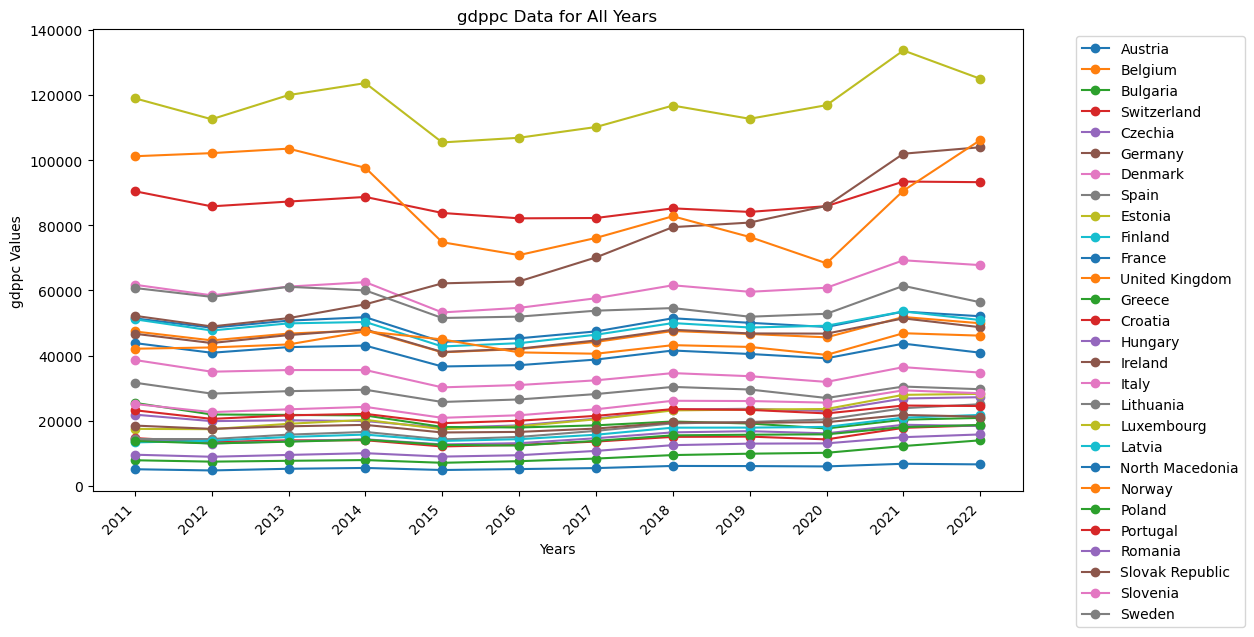

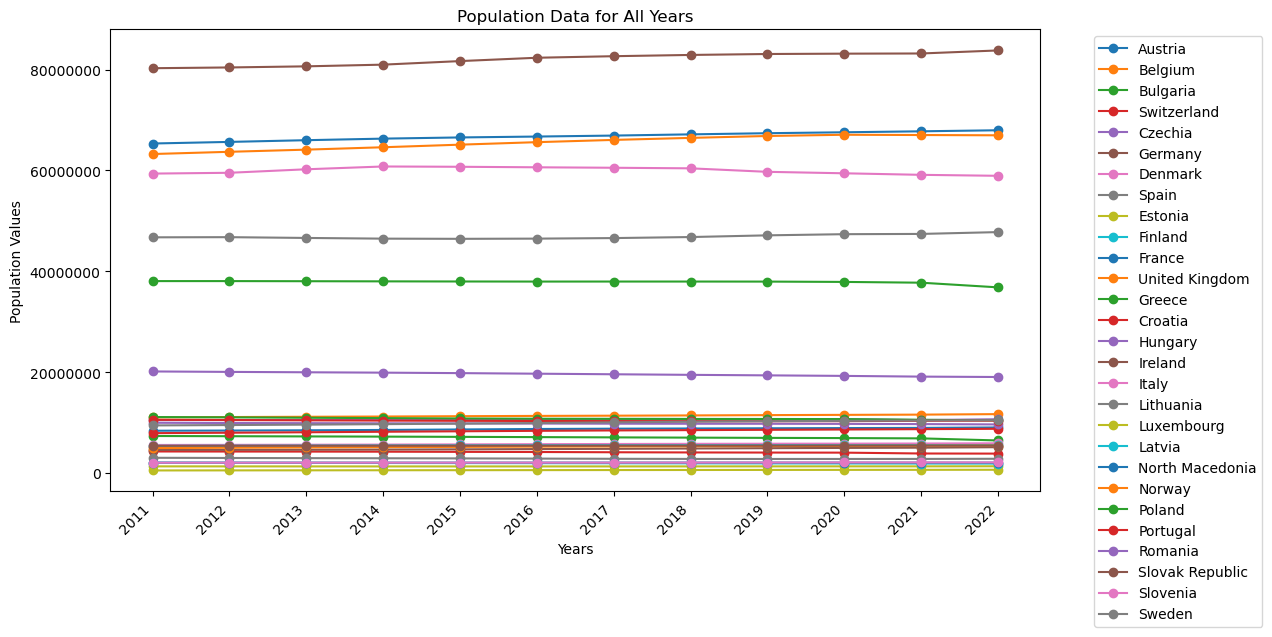

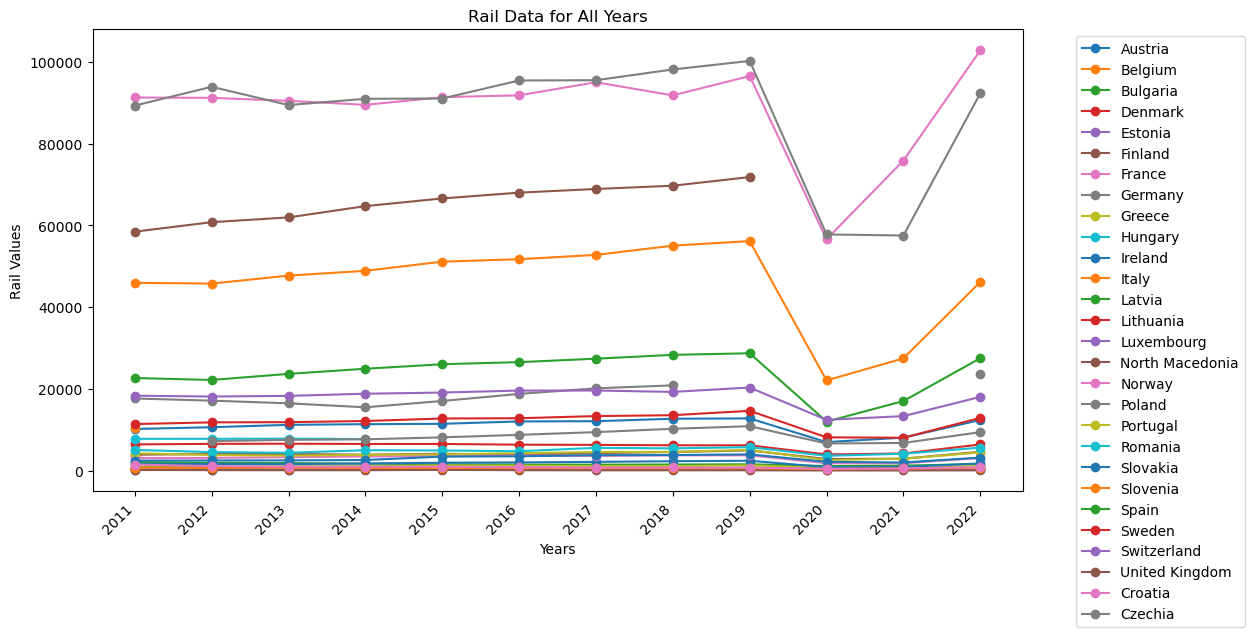

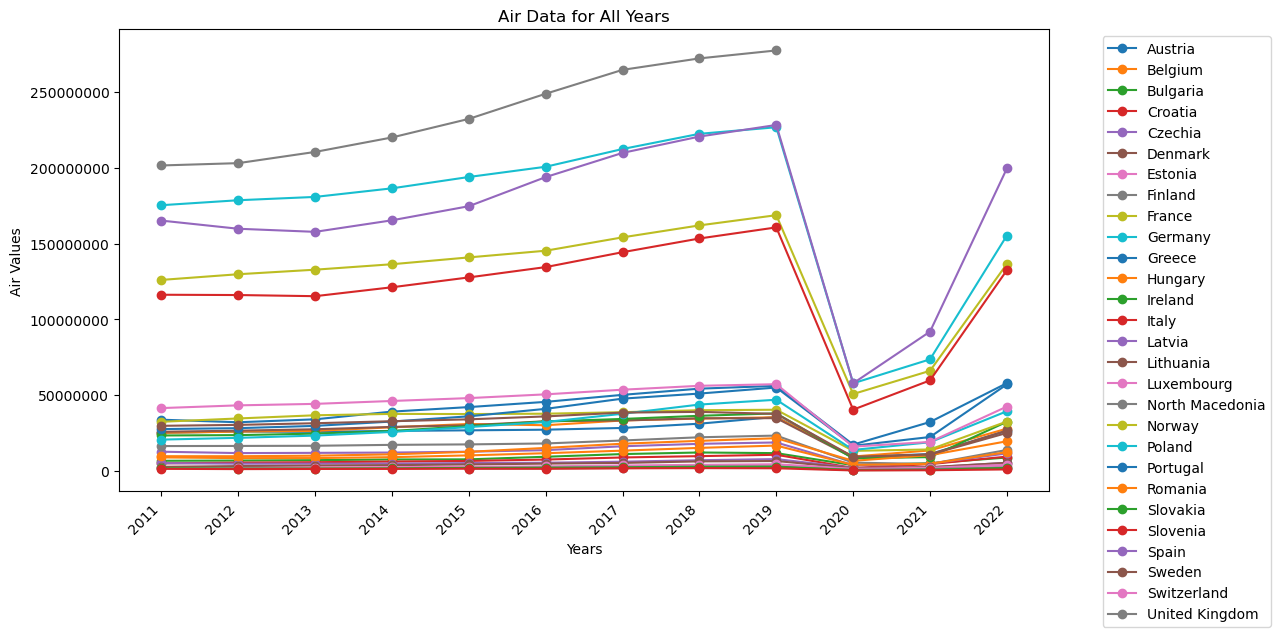

In [31]:
# Function to plot data for all years with countries as different colors
def plot_data(df, title):
    plt.figure(figsize=(12, 6))

    for index, row in df.iterrows():
        plt.plot(df.columns[2:], row[2:], label=row['Country Name'], marker='o')

    plt.xlabel('Years')
    plt.ylabel(f'{title} Values')
    plt.title(f'{title} Data for All Years')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # Set y-axis format to display full numerical values
    plt.ticklabel_format(style='plain', axis='y')

    plt.show()

# Plot data for all years for each dataframe
plot_data(gdppc_read_df, 'gdppc')
plot_data(population_read_df, 'Population')
plot_data(rail_read_df, 'Rail')
plot_data(air_read_df, 'Air')


## Check for missing values in each dataframe

In [32]:
print("Missing values in gdppc DataFrame:")
print(gdppc_read_df.isnull().sum())

print("\nMissing values in Population DataFrame:")
print(population_read_df.isnull().sum())

print("\nMissing values in Rail DataFrame:")
print(rail_read_df.isnull().sum())

print("\nMissing values in Air DataFrame:")
print(air_read_df.isnull().sum())

Missing values in gdppc DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

Missing values in Population DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

Missing values in Rail DataFrame:
Country Name    0
Country Code    0
2011            1
2012            1
2013            1
2014            1
2015            2
2016            2
2017            2
2018            2
2019            3
2020            4
2021            4
2022            3
dtype: int64

Missing values in Air DataFrame:
Country Name    0
Country Code    0
2011            1
2012  

## Filling dataframes

### Air

In [164]:
def fill_missing_data_knn(dataframe):
    start_time = time.time()

    # Filter rows with no missing data
    df_no_missing = dataframe.dropna()

    # Select columns to be used for model training
    features = dataframe.columns[2:]

    # Split the data into training and test sets
    X_train, X_test = train_test_split(df_no_missing[features], test_size=0.2, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a KNNImputer model
    knn_imputer = KNNImputer()

    # Define a hyperparameter grid to search over
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

    # Use GridSearchCV to find optimal hyperparameters
    grid_search = GridSearchCV(knn_imputer, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled)

    # Print optimal hyperparameters
    print("Optimal hyperparameters:", grid_search.best_params_)

    # Apply the optimal model to fill missing data in the original dataframe
    filled_dataframe = dataframe.copy()
    filled_dataframe[features] = scaler.inverse_transform(grid_search.best_estimator_.transform(scaler.transform(dataframe[features])))

    # Evaluate the model on the training set
    y_true_train = df_no_missing[features]
    y_pred_train = scaler.inverse_transform(grid_search.best_estimator_.transform(X_train_scaled))

    # Ensure the number of samples is consistent
    y_true_train = y_true_train.iloc[:len(y_pred_train)]

    mse_train = mean_squared_error(y_true_train, y_pred_train)
    r2_train = r2_score(y_true_train, y_pred_train)

    print("Train MSE: ", mse_train)
    print("Train R-squared: ", r2_train)

    # Evaluate the model on the testing set
    y_true_test = X_test
    y_pred_test = scaler.inverse_transform(grid_search.best_estimator_.transform(X_test_scaled))

    mse_test = mean_squared_error(y_true_test, y_pred_test)
    r2_test = r2_score(y_true_test, y_pred_test)

    print("Test MSE: ", mse_test)
    print("Test R-squared: ", r2_test)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Time taken: {:.2f} seconds".format(elapsed_time))

    return filled_dataframe

air_read_df_filled_knn = fill_missing_data_knn(air_read_df)

Optimal hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Train MSE:  4726957088444556.0
Train R-squared:  -1.0956242046396307
Test MSE:  1.2974285997409866e-17
Test R-squared:  1.0
Time taken: 0.10 seconds


In [165]:
def fill_missing_data_iterative(dataframe, imputer_model):
    start_time = time.time()

    # Filter rows with no missing data
    df_no_missing = dataframe.dropna()

    # Select columns to be used for model training
    features = dataframe.columns[2:]

    # Split the data into training and test sets
    X_train, X_test = train_test_split(df_no_missing[features], test_size=0.2, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Use the specified imputer model
    imputer = imputer_model()

    # Fit the imputer on the training data
    imputer.fit(X_train_scaled)

    # Apply the imputer to fill missing data in the original dataframe
    filled_dataframe = dataframe.copy()
    filled_dataframe[features] = scaler.inverse_transform(imputer.transform(scaler.transform(dataframe[features])))

    # Evaluate the model on the training set
    y_true_train = df_no_missing[features]
    y_pred_train = scaler.inverse_transform(imputer.transform(X_train_scaled))

    # Ensure the number of samples is consistent
    y_true_train = y_true_train.iloc[:len(y_pred_train)]

    mse_train = mean_squared_error(y_true_train, y_pred_train)
    r2_train = r2_score(y_true_train, y_pred_train)

    print("Train MSE: ", mse_train)
    print("Train R-squared: ", r2_train)

    # Evaluate the model on the testing set
    y_true_test = X_test
    y_pred_test = scaler.inverse_transform(imputer.transform(X_test_scaled))

    mse_test = mean_squared_error(y_true_test, y_pred_test)
    r2_test = r2_score(y_true_test, y_pred_test)

    print("Test MSE: ", mse_test)
    print("Test R-squared: ", r2_test)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Time taken: {:.2f} seconds".format(elapsed_time))

    return filled_dataframe
    
air_read_df_filled_ii = fill_missing_data_iterative(air_read_df, IterativeImputer)


Train MSE:  4726957088444556.0
Train R-squared:  -1.0956242046396307
Test MSE:  1.2974285997409866e-17
Test R-squared:  1.0
Time taken: 0.08 seconds


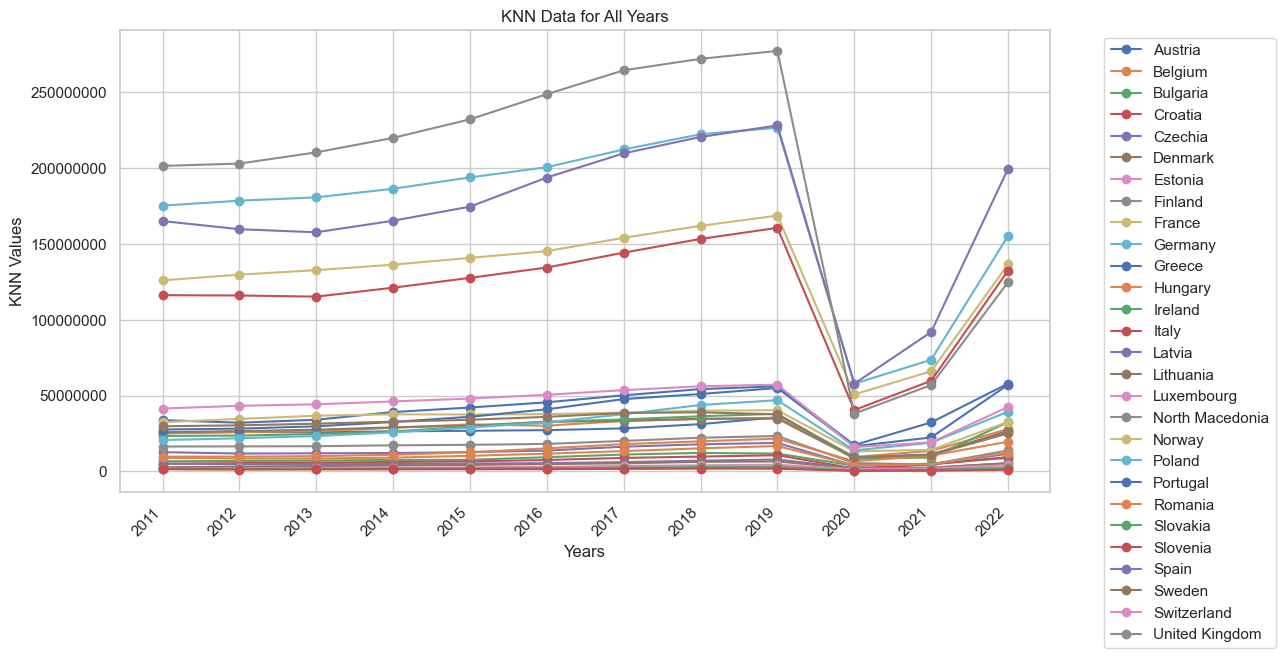

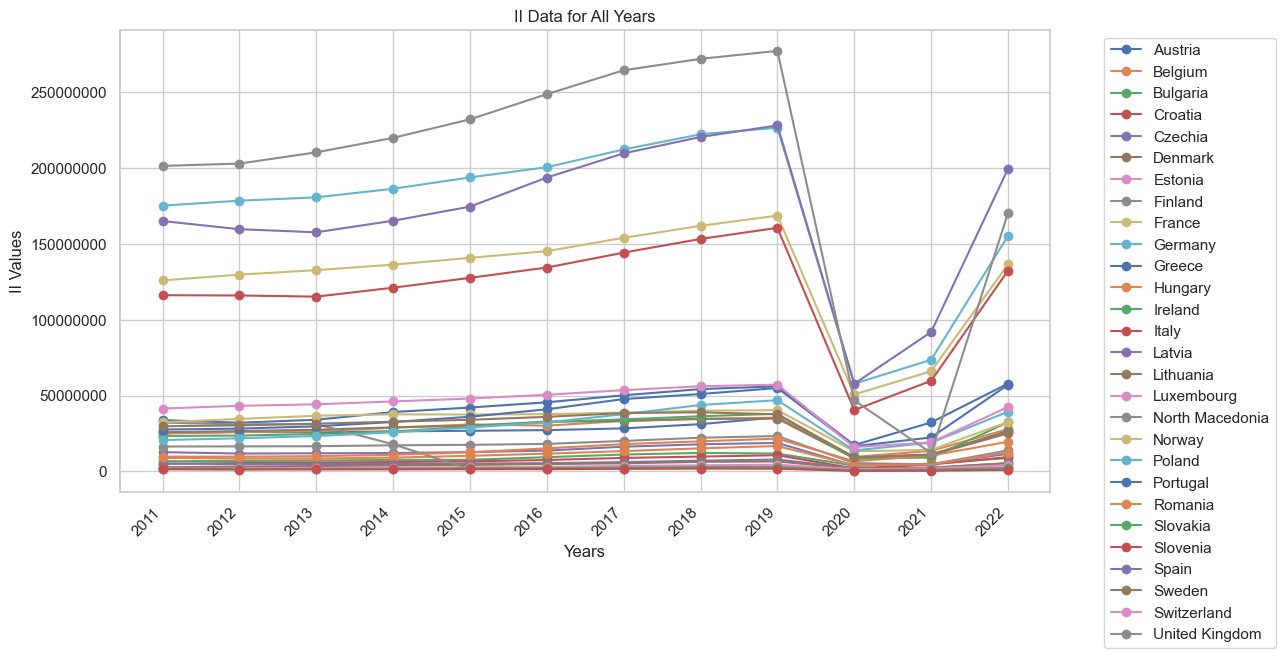

In [166]:
plot_data(air_read_df_filled_knn, 'KNN')
plot_data(air_read_df_filled_ii, 'II')

In [36]:
air_read_df_filled = air_read_df_filled_knn

In [37]:
print("\nMissing values in Air DataFrame:")
print(air_read_df_filled.isnull().sum())


Missing values in Air DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64


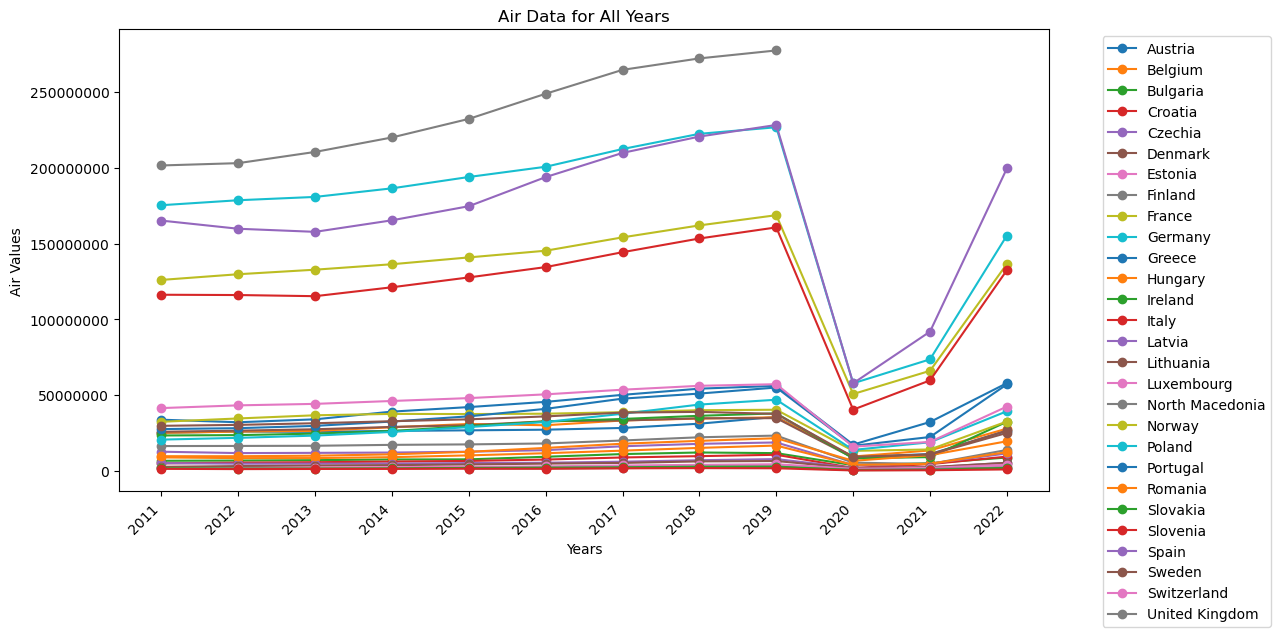

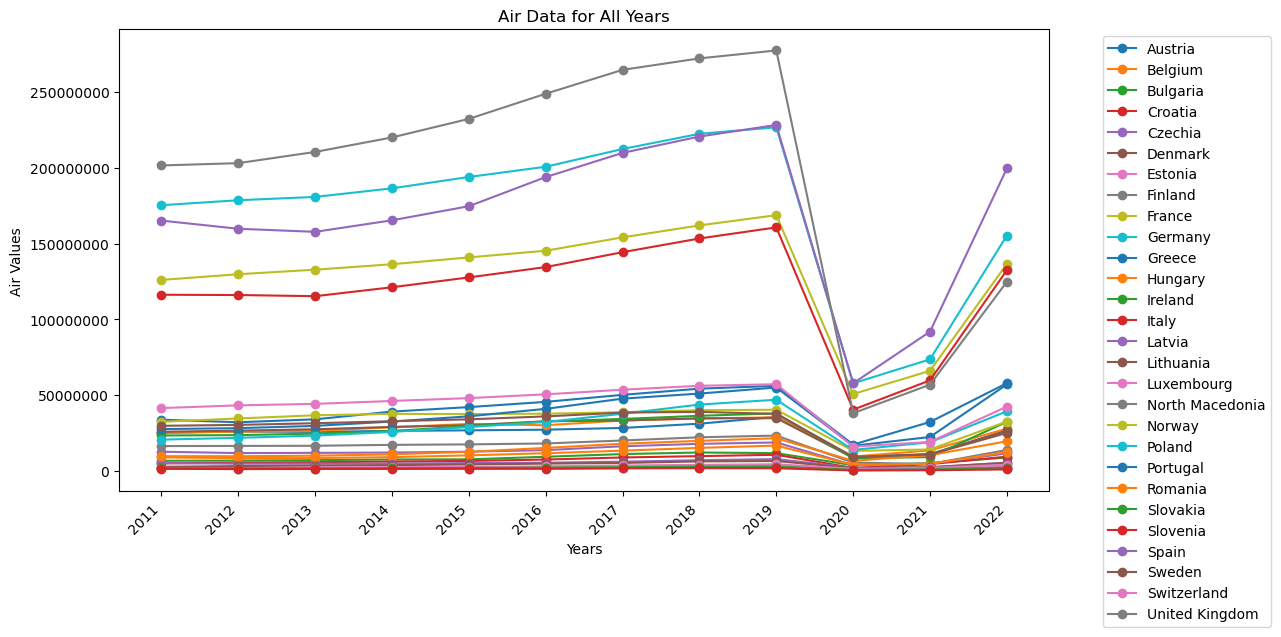

In [38]:
plot_data(air_read_df, 'Air')
plot_data(air_read_df_filled, 'Air')

### Rail

C:\Users\fadiez\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Optimal hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Train MSE:  1785607113.5787036
Train R-squared:  -1.2425245358639472
Test MSE:  0.0
Test R-squared:  1.0
Time taken: 0.11 seconds

Missing values in Rail DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64


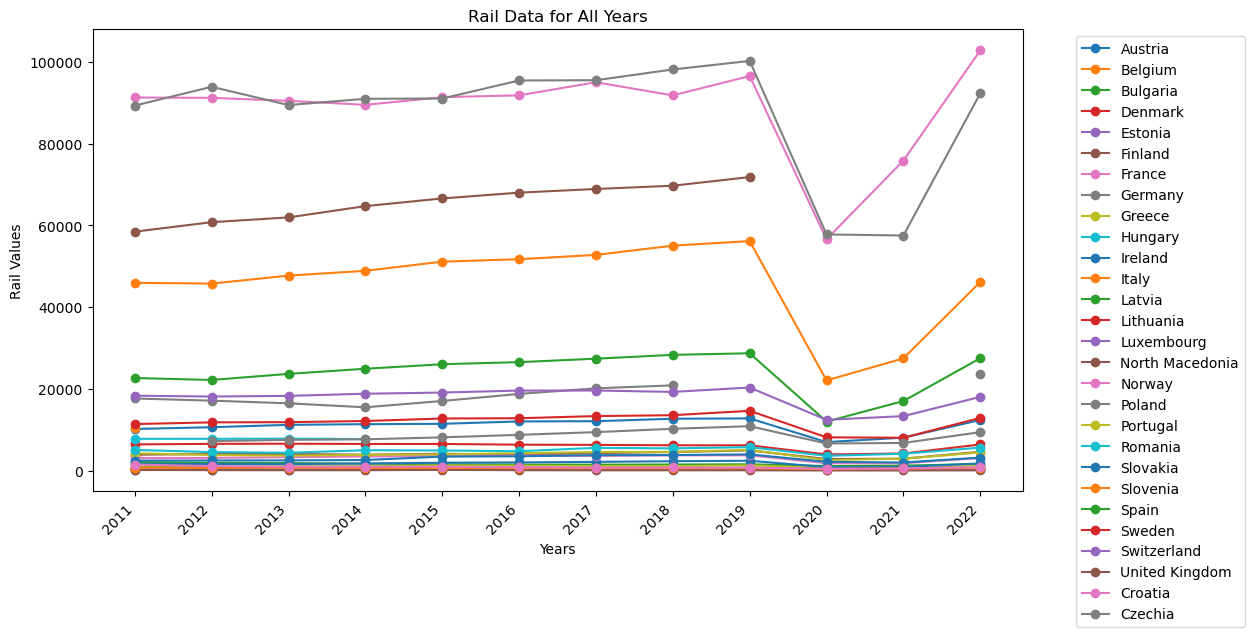

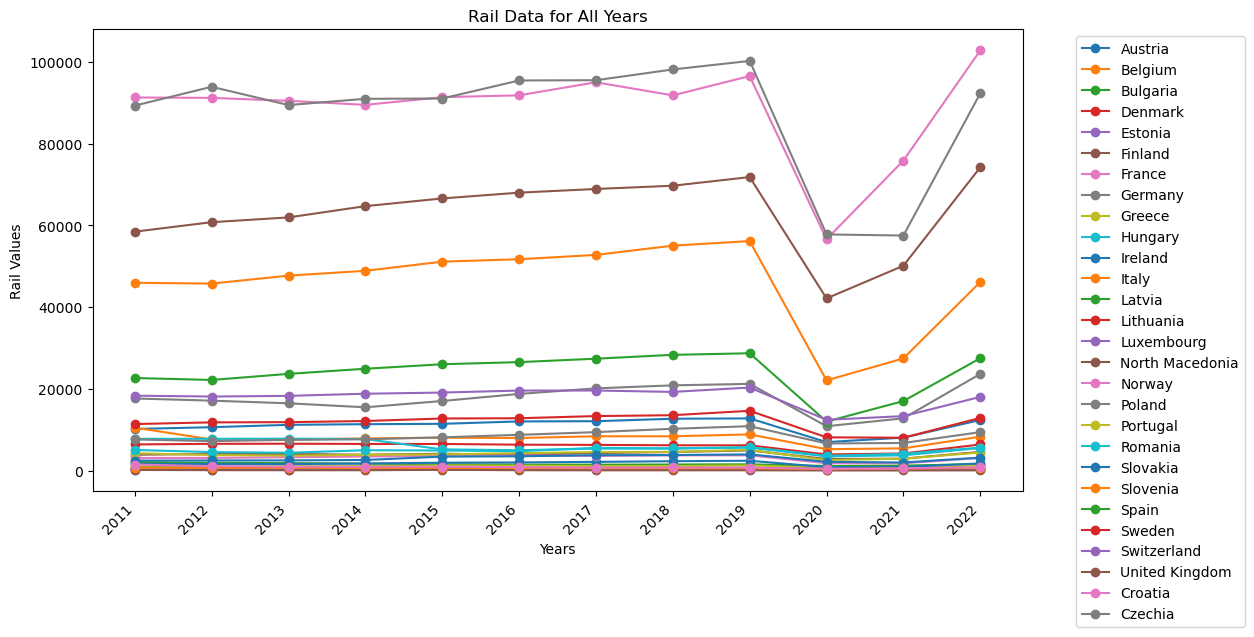

In [39]:
rail_read_df_filled = fill_missing_data_knn(rail_read_df)
print("\nMissing values in Rail DataFrame:")
print(rail_read_df_filled.isnull().sum())
plot_data(rail_read_df, 'Rail')
plot_data(rail_read_df_filled, 'Rail')

In [40]:
rail_read_df_filled

,Country Name,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Austria,AUT,10172.0,10606.000000,11188.000000,11345.000000,11433.000000,12021.000000,12077.0,12681.0,12761.000000,6964.000000,8054.000000,12371.000000
1,Belgium,BEL,10498.0,7614.666667,7586.666667,7868.333333,8052.666667,7954.333333,8389.0,8385.0,8842.000000,5226.000000,5437.333333,8290.333333
2,Bulgaria,BGR,2059.0,1870.000000,1821.000000,1698.000000,1549.000000,1455.000000,1434.0,1476.0,1520.000000,1118.000000,1203.000000,1600.000000
3,Denmark,DNK,6395.0,6534.000000,6566.000000,6513.000000,6507.000000,6332.000000,6280.0,6182.0,6174.000000,3940.000000,4181.000000,6376.000000
4,Estonia,EST,243.0,235.000000,223.000000,280.000000,286.000000,316.000000,366.0,417.0,392.000000,263.000000,290.000000,382.000000
5,Finland,FIN,3882.0,4035.000000,4053.000000,3874.000000,4114.000000,3868.000000,4271.0,4535.0,4924.000000,2820.000000,2903.000000,4572.000000
6,France,FRA,91298.0,91205.000000,90485.000000,89499.000000,91377.000000,91832.000000,95024.0,91818.0,96540.000000,56606.000000,75854.000000,102814.000000
7,Germany,DEU,89316.0,93918.000000,89450.000000,90978.000000,91050.000000,95465.000000,95529.0,98161.0,100252.000000,57787.000000,57518.000000,92313.000000
8,Greece,GRC,958.0,832.000000,1056.000000,1072.000000,1263.000000,1192.000000,1112.0,1104.0,1252.000000,640.000000,653.000000,1117.000000
9,Hungary,HUN,7763.0,7769.000000,7806.000000,7710.000000,5177.000000,4977.000000,5369.0,5381.0,5611.000000,3456.333333,3729.333333,5521.333333


In [41]:
print("Missing values in gdppc DataFrame:")
print(gdppc_read_df.isnull().sum())

print("\nMissing values in Population DataFrame:")
print(population_read_df.isnull().sum())

print("\nMissing values in Rail DataFrame:")
print(rail_read_df_filled.isnull().sum())

print("\nMissing values in Air DataFrame:")
print(air_read_df_filled.isnull().sum())

Missing values in gdppc DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

Missing values in Population DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

Missing values in Rail DataFrame:
Country Name    0
Country Code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

Missing values in Air DataFrame:
Country Name    0
Country Code    0
2011            0
2012  

## Calculation of passenger transport per capita

In [42]:
# Standardizing column names
air_read_df_filled.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(2011, 2023)]
rail_read_df_filled.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(2011, 2023)]
population_read_df.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(2011, 2023)]
gdppc_read_df.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(2011, 2023)]

# Sorting and checking country code identity
air_read_df_filled = air_read_df_filled.sort_values(by='Country Code').reset_index(drop=True)
rail_read_df_filled = rail_read_df_filled.sort_values(by='Country Code').reset_index(drop=True)
population_read_df = population_read_df.sort_values(by='Country Code').reset_index(drop=True)
gdppc_read_df = gdppc_read_df.sort_values(by='Country Code').reset_index(drop=True)

# Checking the identity of country codes and their order
if not air_read_df_filled['Country Code'].equals(rail_read_df_filled['Country Code']) or not air_read_df_filled['Country Code'].equals(population_read_df['Country Code']) or not air_read_df_filled['Country Code'].equals(gdppc_read_df['Country Code']):
    print("Error: Country codes are not identical or the order does not match.")
    # Add error handling if needed

# Creating a new dataframe rail_per_capita
rail_per_capita = pd.DataFrame(data={'Country Code': air_read_df_filled['Country Code']})
for year in range(2011, 2023):
    rail_per_capita[f'{year}'] = rail_read_df_filled[str(year)] / population_read_df[str(year)]

# Creating a new dataframe air_per_capita
air_per_capita = pd.DataFrame(data={'Country Code': air_read_df_filled['Country Code']})
for year in range(2011, 2023):
    air_per_capita[f'{year}'] = air_read_df_filled[str(year)] / population_read_df[str(year)]

In [43]:
rail_per_capita

,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AUT,0.001212,0.001258,0.001319,0.001327,0.001323,0.001376,0.001373,0.001434,0.001437,0.000781,0.000899,0.001368
1,BEL,0.000951,0.000686,0.000680,0.000702,0.000714,0.000702,0.000737,0.000734,0.000770,0.000453,0.000469,0.000709
2,BGR,0.000280,0.000256,0.000251,0.000235,0.000216,0.000204,0.000203,0.000210,0.000218,0.000161,0.000175,0.000247
3,CHE,0.002315,0.002265,0.002259,0.002296,0.002305,0.002338,0.002317,0.002260,0.002369,0.001438,0.001530,0.002054
4,CZE,0.000725,0.000685,0.000714,0.000726,0.000770,0.000827,0.000888,0.000961,0.001017,0.000619,0.000643,0.000880
5,DEU,0.001113,0.001168,0.001109,0.001123,0.001115,0.001159,0.001156,0.001184,0.001207,0.000695,0.000691,0.001102
6,DNK,0.001148,0.001169,0.001169,0.001154,0.001145,0.001105,0.001089,0.001067,0.001062,0.000676,0.000714,0.001080
7,ESP,0.000484,0.000474,0.000508,0.000536,0.000560,0.000571,0.000588,0.000605,0.000609,0.000253,0.000359,0.000575
8,EST,0.000183,0.000178,0.000169,0.000213,0.000217,0.000240,0.000278,0.000315,0.000295,0.000198,0.000218,0.000283
9,FIN,0.000720,0.000745,0.000745,0.000709,0.000751,0.000704,0.000775,0.000822,0.000892,0.000510,0.000524,0.000823


In [44]:
air_per_capita

,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AUT,2.995553,3.080190,3.036587,3.086541,3.095562,3.111199,3.219900,3.522238,4.014021,1.028212,1.240042,2.917675
1,BEL,2.274152,2.333634,2.364814,2.567233,2.745991,2.657728,2.923959,3.019703,3.079924,0.820362,1.165181,2.385276
2,BGR,0.905241,0.933371,0.974423,1.041080,1.060317,1.308144,1.567656,1.727779,1.679110,0.537786,0.733944,1.362316
3,CHE,5.237331,5.406632,5.466149,5.633094,5.798609,6.031703,6.337666,6.593538,6.669675,1.853033,2.195371,4.834246
4,CZE,1.205262,1.117172,1.131016,1.147694,1.201587,1.293955,1.533404,1.678113,1.758557,0.357209,0.452624,1.080634
5,DEU,2.183944,2.220569,2.241699,2.302298,2.374152,2.437044,2.569526,2.682833,2.729041,0.694990,0.884625,1.853298
6,DNK,4.632975,4.745129,4.890464,5.141359,5.295257,5.719812,5.769528,5.989527,5.981700,1.484832,1.847074,4.514553
7,ESP,3.533241,3.415883,3.383351,3.557471,3.760429,4.170721,4.503317,4.714146,4.842753,1.220237,1.938136,4.177023
8,EST,1.437029,1.665104,1.486016,1.536506,1.642821,1.683391,2.000286,2.265946,2.455353,0.645222,0.971455,2.024973
9,FIN,3.038896,3.040063,3.045684,3.144172,3.189916,3.293714,3.640916,4.020203,4.217601,0.981749,0.821960,2.486018


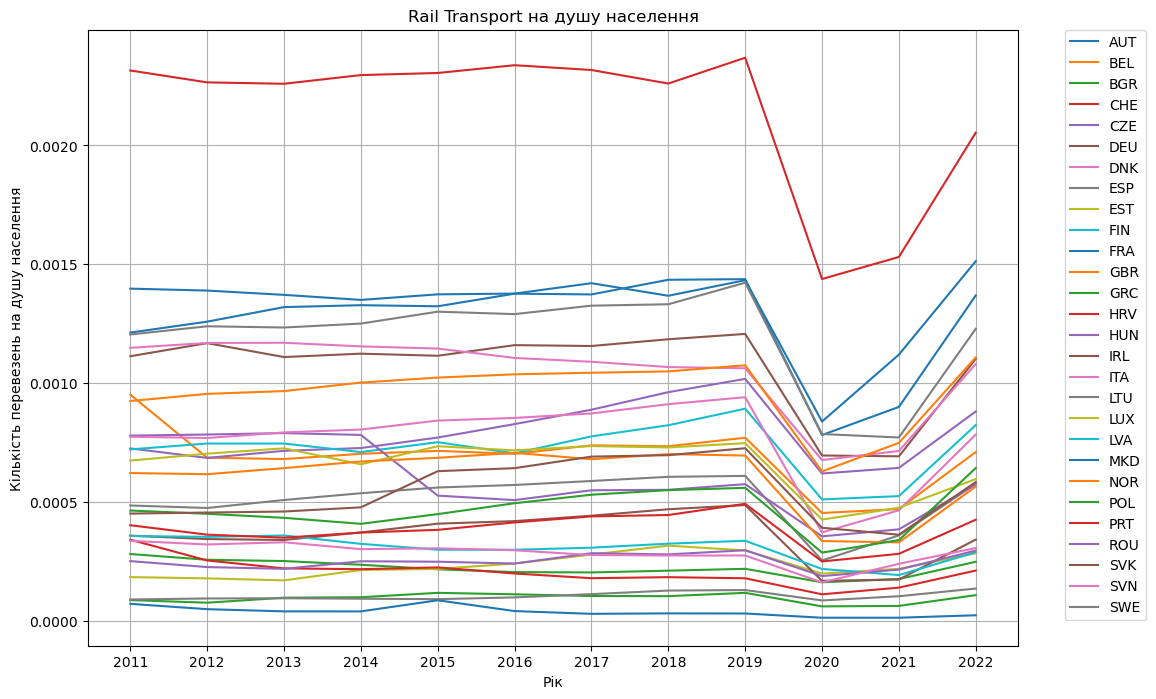

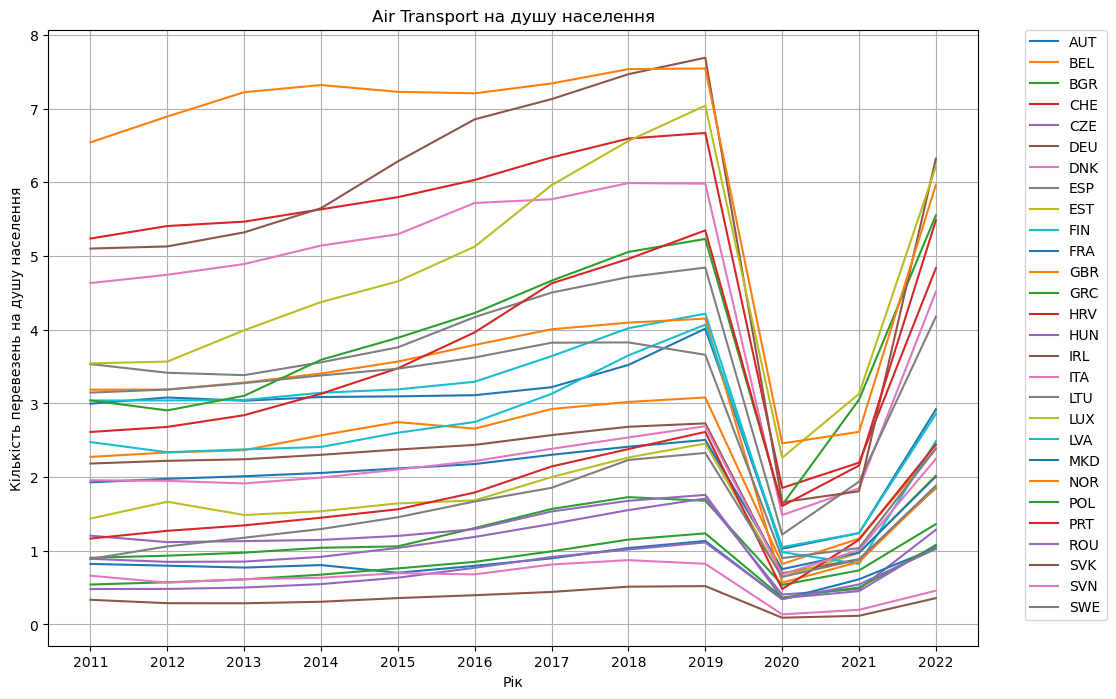

In [45]:
def plot_transport_per_capita(df, transport_mode):
    # Selecting data for all countries
    data_to_plot = df.copy()

    # Plotting the graph
    plt.figure(figsize=(12, 8))
    years = [str(year) for year in range(2011, 2023)]
    for country in data_to_plot['Country Code']:
        plt.plot(years, data_to_plot[data_to_plot['Country Code'] == country].iloc[0, 1:], label=country)

    plt.title(f'{transport_mode} Per Capita')
    plt.xlabel('Year')
    plt.ylabel('Number of Transportations Per Capita')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.show()

# Using the function for different dataframes
plot_transport_per_capita(rail_per_capita, 'Rail Transport')
plot_transport_per_capita(air_per_capita, 'Air Transport')


## Interactive dashboard

In [303]:
df = air_per_capita
# Rename columns with years for convenience
df = df.rename(columns={'Country Code': 'Country'})
df = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='AirPerCapita')

# Create an interactive map with animation over years, limited to Europe
fig = px.choropleth(df, 
                    locations='Country',
                    animation_frame='Year',  # Animation over years
                    color='AirPerCapita',  # Color based on the indicator
                    hover_name='Country',
                    title='Air Passengers per Capita (2011-2022)',
                    color_continuous_scale='Viridis',  # Linear color scale
                    scope='europe')  # Limit to Europe

# Increase the size of the figure
fig.update_layout(width=800, height=600)

# Display the map
fig.show()


## Hypotesis tests

### 1. T-Test of hypotesys that the mean values of railway journeys per capita in 2019 and 2020 are equal

In [46]:
# Extract relevant columns (years 2019 and 2020) for the analysis
before_pandemic = rail_per_capita['2019']
after_pandemic = rail_per_capita['2022']

# Perform a t-test for paired samples
t_statistic, p_value = ttest_rel(before_pandemic, after_pandemic)

# Display the test results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Determine statistical significance based on the p-value and chosen significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference.")


T-Statistic: 3.1761633842273422
P-Value: 0.0037146373906900994
Reject the null hypothesis. There is a statistically significant difference.


### 2. T-Test of hypotesys that the mean values of air journeys per capita in 2019 and 2020 are equal

In [47]:
# Extract relevant columns (years 2019 and 2020) for the analysis
before_pandemic_air = air_per_capita['2019']
after_pandemic_air = air_per_capita['2020']

# Perform a t-test for paired samples
t_statistic_air, p_value_air = ttest_rel(before_pandemic_air, after_pandemic_air)

# Display the test results
print(f'T-Statistic for Air Travel: {t_statistic_air}')
print(f'P-Value for Air Travel: {p_value_air}')

# Determine statistical significance based on the p-value and chosen significance level (e.g., 0.05)
alpha = 0.05
if p_value_air < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in air travel.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in air travel.")


T-Statistic for Air Travel: 9.030993218091698
P-Value for Air Travel: 1.2062368132271641e-09
Reject the null hypothesis. There is a statistically significant difference in air travel.


## Countries comparation

### 1. T-test to check hypotesis that there is no statistical difference between rail journeys per capita for Ireland and Switzerland

In [53]:
# Data for comparison (Ireland and Switzerland)
ireland_data = rail_per_capita[rail_per_capita['Country Code'] == 'IRL'][['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
switzerland_data = rail_per_capita[rail_per_capita['Country Code'] == 'CHE'][['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

# Performing the t-test
t_stat, p_value = ttest_ind(ireland_data.values.flatten(), switzerland_data.values.flatten())

# Displaying the results
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the means.")

T-statistic: -18.463851774646326
p-value: 7.031125968529787e-15
Reject the null hypothesis: There is a statistically significant difference between the means.


### 2. ANOVA test to check the hypotesis that the average values of railway transport indicators per capita in Austria (AUT), Germany (DEU), and Italy (ITA) are not different.

In [54]:
# Data for comparison (Austria, Germany, Italy)
austria_data = rail_per_capita[rail_per_capita['Country Code'] == 'AUT'][['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
germany_data = rail_per_capita[rail_per_capita['Country Code'] == 'DEU'][['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
italy_data = rail_per_capita[rail_per_capita['Country Code'] == 'ITA'][['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

# Performing ANOVA
f_stat, p_value = f_oneway(austria_data.values.flatten(), germany_data.values.flatten(), italy_data.values.flatten())

# Displaying the results
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the means of the groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the means of the groups.")


F-statistic: 21.448342676053976
p-value: 1.0759786514667093e-06
Reject the null hypothesis: There is a statistically significant difference between the means of the groups.


### 3. Wilcoxon Rank-Sum Test to check if The percentage changes in railway transport indicators between Ireland (IRL) and the United Kingdom (GBR) are not statistically different over the years 2019 to 2022

In [55]:
# Copy data for selected countries to a new dataframe
selected_countries = ['IRL', 'GBR']
selected_df = rail_per_capita[rail_per_capita['Country Code'].isin(selected_countries)].copy()

# Add columns to calculate the percentage difference between each consecutive year
for year in range(2019, 2022):
    col_name = f'{year}-{year + 1}_Percent_Change'
    selected_df[col_name] = ((selected_df[str(year + 1)] - selected_df[str(year)]) / selected_df[str(year)]) * 100

# Drop the original columns
selected_df = selected_df.drop(selected_df.columns[1:13], axis=1)

# Display the resulting dataframe
selected_df


,Country Code,2019-2020_Percent_Change,2020-2021_Percent_Change,2021-2022_Percent_Change
11,GBR,-41.560689,19.083132,48.162901
15,IRL,-65.591445,3.326225,97.235706


In [56]:
# Extract data for each country
ireland_data = selected_df[selected_df['Country Code'] == 'IRL'].iloc[:, 1:].values.flatten()
uk_data = selected_df[selected_df['Country Code'] == 'GBR'].iloc[:, 1:].values.flatten()

# Perform the Wilcoxon Rank-Sum Test
statistic, p_value = ranksums(ireland_data, uk_data)

# Display the test results
print(f'Wilcoxon Rank-Sum Test Statistic: {statistic}')
print(f'p-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in percentage changes between Ireland and the United Kingdom.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in percentage changes between Ireland and the United Kingdom.")


Wilcoxon Rank-Sum Test Statistic: -0.2182178902359924
p-value: 0.8272593465627113
Fail to reject the null hypothesis: There is no statistically significant difference in percentage changes between Ireland and the United Kingdom.


### 4. Chi-Squared Test of hypotesis "There is no statistically significant difference in the distribution of railway transport among countries over the years."

In [67]:
# Select data for all countries and years
selected_years = [str(year) for year in range(2011, 2023)]
selected_data = rail_per_capita[selected_years]

# Perform the chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(selected_data)

# Print the test results
print(f'Chi-Squared Test Statistic: {chi2_stat}')
print(f'p-value: {p_value}')

# Interpret the test results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in the distribution of railway transport among countries over the years.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the distribution of railway transport among countries over the years.")

Chi-Squared Test Statistic: 0.0017681856328829997
p-value: 1.0
Fail to reject the null hypothesis: There is no statistically significant difference in the distribution of railway transport among countries over the years.


### 5. Kruskal-Wallis Test, "There is no statistically significant difference in the distribution of rail indicators among countries and years."

In [68]:
# Select data for all countries and years
selected_years = [str(year) for year in range(2011, 2023)]
selected_countries_data = rail_per_capita[selected_years]

# Convert data to a format suitable for the Kruskal-Wallis test
data_for_test = [selected_countries_data[country].dropna().values for country in selected_countries_data.columns]

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*data_for_test)

# Print the test results
print(f'Kruskal-Wallis Test Statistic: {statistic}')
print(f'p-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in the distribution of rail indicators among countries and years.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the distribution of rail indicators among countries and years.")

Kruskal-Wallis Test Statistic: 13.974754738690763
p-value: 0.23439355193462838
Fail to reject the null hypothesis: There is no statistically significant difference in the distribution of rail indicators among countries and years.


# Text analysis

## Import dataset

### Reddit

In [98]:
file_path = 'the-reddit-covid-dataset-posts.csv'

# Read the file into a DataFrame
reddit_posts_df = pd.read_csv(file_path)

In [99]:
reddit_posts_df

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,qftvfn,3h9d4,autonewspaper,False,1635206379,https://old.reddit.com/r/AutoNewspaper/comment...,washingtontimes.com,https://www.washingtontimes.com/news/2021/oct/...,NaN,"[Politics] - Kay Ivey, Alabama governor, direc...",1
1,post,qftusg,2x4yx,coronavirus,False,1635206322,https://old.reddit.com/r/Coronavirus/comments/...,twitter.com,NaN,[deleted],More Floridians dead from COVID than Vietnam W...,1
2,post,qftugv,3h9d4,autonewspaper,False,1635206292,https://old.reddit.com/r/AutoNewspaper/comment...,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm...,NaN,[NZ] - Covid-19 coronavirus Delta outbreak: La...,1
3,post,qftuge,3h9d4,autonewspaper,False,1635206291,https://old.reddit.com/r/AutoNewspaper/comment...,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm...,NaN,[NZ] - Covid 19 Delta outbreak: Man arrested a...,1
4,post,qftucd,4egz78,cointuta,False,1635206281,https://old.reddit.com/r/CoinTuta/comments/qft...,cointuta.com,https://www.cointuta.com/covid-19-more-likely-...,NaN,Covid-19 more likely to cause neurological iss...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4510173,post,a1fhqm,izk6m,u_yanasr1,False,1543479223,https://old.reddit.com/r/u_yanasr1/comments/a1...,mediartlifesciences.com,http://www.mediartlifesciences.com/covid/,NaN,"Covid |""Covid Capsule""",1
4510174,post,9j0mn1,izk6m,u_yanasr1,False,1537950011,https://old.reddit.com/r/u_yanasr1/comments/9j...,mediartlifesciences.com,http://www.mediartlifesciences.com/covid/,NaN,Covid | Covid | Mediart Life Sciences,1
4510175,post,96464j,lisol,u_shriya-mehta-blog,False,1533878861,https://old.reddit.com/r/u_shriya-mehta-blog/c...,self.shriya-mehta-blog,NaN,[Covid](http://www.mediartlifesciences.com/co...,Covid | Covid | Mediart Life Sciences,1
4510176,post,2srkns,2qh0u,pics,False,1421527720,https://old.reddit.com/r/pics/comments/2srkns/...,i.imgur.com,NaN,[deleted],Vintage style covid.,1


#### Data preparation

In [100]:
# Drop specified columns
columns_to_drop = ['type', 'id', 'subreddit.id', 'selftext', 'subreddit.name', 'subreddit.nsfw', 'permalink', 'domain', 'url']
reddit_posts_df = reddit_posts_df.drop(columns=columns_to_drop)

# Display the updated DataFrame
reddit_posts_df

,created_utc,title,score
0,1635206379,"[Politics] - Kay Ivey, Alabama governor, direc...",1
1,1635206322,More Floridians dead from COVID than Vietnam W...,1
2,1635206292,[NZ] - Covid-19 coronavirus Delta outbreak: La...,1
3,1635206291,[NZ] - Covid 19 Delta outbreak: Man arrested a...,1
4,1635206281,Covid-19 more likely to cause neurological iss...,1
...,...,...,...
4510173,1543479223,"Covid |""Covid Capsule""",1
4510174,1537950011,Covid | Covid | Mediart Life Sciences,1
4510175,1533878861,Covid | Covid | Mediart Life Sciences,1
4510176,1421527720,Vintage style covid.,1


In [101]:
# Get unique values from the "score" column
unique_scores = reddit_posts_df['score'].unique()

# Print unique values
print("Unique values in the 'score' column:")
print(unique_scores)

Унікальні значення колонки 'score':
[   1    0    4 ... 5703 7126 8406]


In [102]:
# Initialize the lemmatizer and load stop words
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning special characters, converting to lowercase, and lemmatizing for the 'title' column
def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stop words and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the words into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the cleaning function to the 'title' column
reddit_posts_df['title_cleaned'] = reddit_posts_df['title'].apply(preprocess_text)

# Display the updated DataFrame
print(reddit_posts_df[['title', 'title_cleaned']])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fadiez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fadiez\AppData\Roaming\nltk_data...


                                                     title  \
0        [Politics] - Kay Ivey, Alabama governor, direc...   
1        More Floridians dead from COVID than Vietnam W...   
2        [NZ] - Covid-19 coronavirus Delta outbreak: La...   
3        [NZ] - Covid 19 Delta outbreak: Man arrested a...   
4        Covid-19 more likely to cause neurological iss...   
...                                                    ...   
4510173                             Covid |"Covid Capsule"   
4510174              Covid | Covid | Mediart Life Sciences   
4510175              Covid | Covid | Mediart Life Sciences   
4510176                               Vintage style covid.   
4510177              Innovative Covid Products at ISE 2012   

                                             title_cleaned  
0        politics kay ivey alabama governor directs age...  
1                   floridian dead covid vietnam war video  
2        nz covid coronavirus delta outbreak latest cas...  
3        nz

### Data selection

In [105]:
# Function to check if the text contains keywords related to both railway and Ireland
def contains_railway_and_ireland_keywords(text):
    railway_keywords = ['rail', 'train', 'railway']  # Words related to railway
    ireland_keywords = ['ireland', 'irish']  # Words related to Ireland
    return any(keyword in text for keyword in railway_keywords) and any(keyword in text for keyword in ireland_keywords)

# Filtering DataFrame using the contains_railway_and_ireland_keywords function
railway_ireland_related_posts = reddit_posts_df[reddit_posts_df['title_cleaned'].apply(contains_railway_and_ireland_keywords)]

# Outputting the results
print("Titles related to both railway and Ireland:")
print(railway_ireland_related_posts[['title_cleaned']])

Titles related to both railway and Ireland:
                                             title_cleaned
4344     september started see kick case delta plus cov...
12899    ie carbon emission last year despite covid res...
28084    first flight back covid lockdown fly ireland u...
151201   impact covid rail passenger transport largest ...
260801   ie news delta derail new zealand zero covid st...
...                                                    ...
3800123  world want life back german rail covid lockdow...
4051852  ie genetics shed light origin irish strain cov...
4052153   ie genetics shed light origin irish strain covid
4373032  world covid move censure brazil bolsonaro dera...
4436200      irish rail everything power stop spread covid

[128 rows x 1 columns]


In [106]:
# Function to check if the text contains keywords related to both railway and United Kingdom
def contains_railway_and_uk_keywords(text):
    railway_keywords = ['rail', 'train', 'railway']  # Words related to railway
    uk_keywords = ['uk', 'united kingdom', 'britain', 'british']  # Words related to United Kingdom
    return any(keyword in text for keyword in railway_keywords) and any(keyword in text for keyword in uk_keywords)

# Filtering DataFrame using the contains_railway_and_uk_keywords function
railway_uk_related_posts = reddit_posts_df[reddit_posts_df['title_cleaned'].apply(contains_railway_and_uk_keywords)]

# Outputting the results
print("Titles related to both railway and United Kingdom:")
print(railway_uk_related_posts[['title_cleaned']])


Titles related to both railway and United Kingdom:
                                             title_cleaned
4528     new delta plus covid variant strain rising uk ...
8807     covid live ay strain delta variant investigati...
8815     covid live ay strain delta variant investigati...
17186    new covid delta variant strain detected u spre...
17581    covid new delta variant strain detected u spre...
...                                                    ...
4449937  ukchina rail link resume following covid suspe...
4454093  luke thomas make great point covid mma gym goi...
4459593  coronavirus uk team gb scare athlete diagnosed...
4494347  mitchellvii completely misleading stat covid c...
4510164  uk news said named covid state new vaccine str...

[3999 rows x 1 columns]


#### Saving data

In [108]:
# Connect to SQLite database
conn = sqlite3.connect('reddit.db')

# Save the DataFrames to SQLite tables
reddit_posts_df.to_sql('reddit_posts', conn, index=False, if_exists='replace')
railway_ireland_related_posts.to_sql('railway_ireland_related_posts', conn, index=False, if_exists='replace')
railway_uk_related_posts.to_sql('railway_uk_related_posts', conn, index=False, if_exists='replace')

# Close the connection
conn.close()


In [113]:
# Connect to SQLite database
conn = sqlite3.connect('reddit.db')

# Read data from SQLite tables into DataFrames
reddit_irl_df = pd.read_sql('SELECT * FROM railway_ireland_related_posts', conn)
reddit_gbp_df = pd.read_sql('SELECT * FROM railway_uk_related_posts', conn)

# Close the connection
conn.close()

# Display the first few rows of each DataFrame
print("reddit_irl_df:")
print(reddit_irl_df.head())

print("\nreddit_gbp_df:")
print(reddit_gbp_df.head())


reddit_irl_df:
   created_utc                                              title  score  \
0   1635094147  ‘September is when we started to see it kick o...      4   
1   1634857506  [IE] - Carbon emissions down last year by just...      1   
2   1634559236  My first flight back after Covid 19 Lockdowns,...      4   
3   1631768949  Impact of COVID-19 on rail passenger transport...     49   
4   1629884679  [IE] - In the News: Will Delta derail New Zeal...      1   

                                       title_cleaned  
0  september started see kick case delta plus cov...  
1  ie carbon emission last year despite covid res...  
2  first flight back covid lockdown fly ireland u...  
3  impact covid rail passenger transport largest ...  
4  ie news delta derail new zealand zero covid st...  

reddit_gbp_df:
   created_utc                                              title  score  \
0   1635089590  New Delta Plus COVID-19 variant strain rising ...      1   
1   1634951054  Covid live: AY

### TextBlob sentiment analysis

In [114]:
# Function to perform sentiment analysis using TextBlob for a DataFrame
def analyze_sentiment_textblob_dataframe(dataframe):
    start_time = time.time()
    # Apply sentiment analysis to the entire 'title_cleaned' column
    dataframe['sentiment_textblob'] = dataframe['title_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
    end_time = time.time()
    # Calculate the total time taken for sentiment analysis
    time_taken = end_time - start_time
    return time_taken

In [124]:
# Calculate the time taken for sentiment analysis for each DataFrame
time_taken_irl_textblob = analyze_sentiment_textblob_dataframe(reddit_irl_df)
time_taken_gbp_textblob = analyze_sentiment_textblob_dataframe(reddit_gbp_df)

# Display the total time taken for sentiment analysis using TextBlob
print(f"Total time taken for sentiment analysis using TextBlob for reddit_irl_df: {time_taken_irl_textblob:.6f} seconds")
print(f"Total time taken for sentiment analysis using TextBlob for reddit_gbp_df: {time_taken_gbp_textblob:.6f} seconds")

Total time taken for sentiment analysis using TextBlob for reddit_irl_df: 0.041152 seconds
Total time taken for sentiment analysis using TextBlob for reddit_gbp_df: 1.089410 seconds


### VADER sentiment analysis

In [125]:
# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fadiez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [126]:
# Function to perform sentiment analysis using VADER for a DataFrame
def analyze_sentiment_vader_dataframe(dataframe):
    start_time = time.time()
    sid = SentimentIntensityAnalyzer()
    # Apply sentiment analysis to the entire 'title_cleaned' column
    dataframe['sentiment_vader'] = dataframe['title_cleaned'].apply(lambda x: sid.polarity_scores(x)['compound'])
    end_time = time.time()
    # Calculate the total time taken for sentiment analysis
    time_taken = end_time - start_time
    return time_taken


In [127]:
# Calculate the time taken for sentiment analysis for each DataFrame
time_taken_irl = analyze_sentiment_vader_dataframe(reddit_irl_df)
time_taken_gbp = analyze_sentiment_vader_dataframe(reddit_gbp_df)

# Display the total time taken for sentiment analysis
print(f"Total time taken for sentiment analysis for reddit_irl_df: {time_taken_irl:.6f} seconds")
print(f"Total time taken for sentiment analysis for reddit_gbp_df: {time_taken_gbp:.6f} seconds")

Total time taken for sentiment analysis for reddit_irl_df: 0.059492 seconds
Total time taken for sentiment analysis for reddit_gbp_df: 1.027769 seconds


## Check data normality

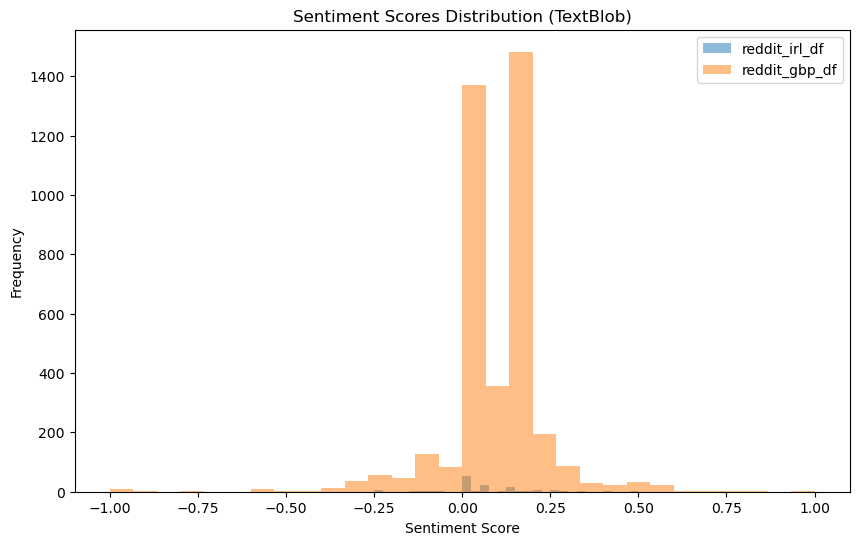

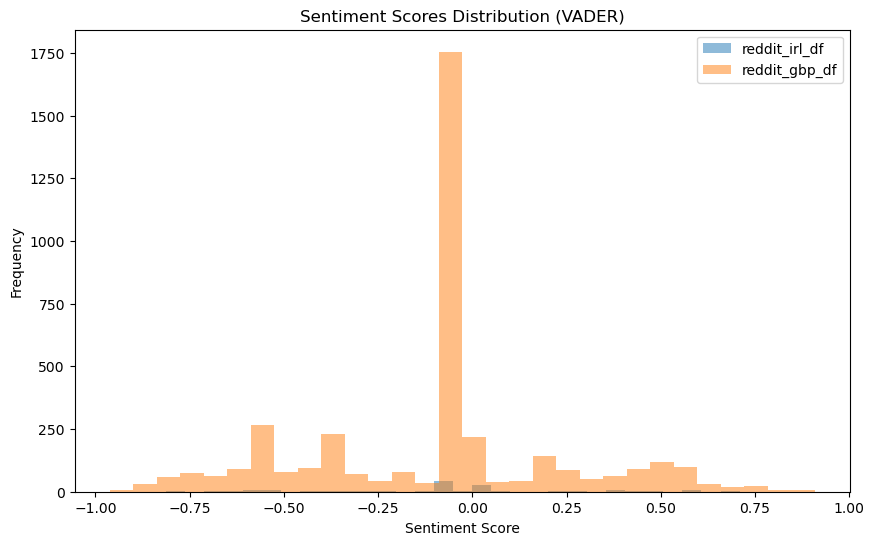

In [130]:
# Plot histogram for sentiment scores using TextBlob
plt.figure(figsize=(10, 6))
plt.hist(reddit_irl_df['sentiment_textblob'], bins=30, alpha=0.5, label='reddit_irl_df')
plt.hist(reddit_gbp_df['sentiment_textblob'], bins=30, alpha=0.5, label='reddit_gbp_df')
plt.title('Sentiment Scores Distribution (TextBlob)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for sentiment scores using VADER
plt.figure(figsize=(10, 6))
plt.hist(reddit_irl_df['sentiment_vader'], bins=30, alpha=0.5, label='reddit_irl_df')
plt.hist(reddit_gbp_df['sentiment_vader'], bins=30, alpha=0.5, label='reddit_gbp_df')
plt.title('Sentiment Scores Distribution (VADER)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [131]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
_, p_textblob_irl = shapiro(reddit_irl_df['sentiment_textblob'])
_, p_textblob_gbp = shapiro(reddit_gbp_df['sentiment_textblob'])
_, p_vader_irl = shapiro(reddit_irl_df['sentiment_vader'])
_, p_vader_gbp = shapiro(reddit_gbp_df['sentiment_vader'])

# Display p-values
print("Shapiro-Wilk Test p-values:")
print(f"TextBlob - reddit_irl_df: {p_textblob_irl:.4f}")
print(f"TextBlob - reddit_gbp_df: {p_textblob_gbp:.4f}")
print(f"VADER - reddit_irl_df: {p_vader_irl:.4f}")
print(f"VADER - reddit_gbp_df: {p_vader_gbp:.4f}")


Shapiro-Wilk Test p-values:
TextBlob - reddit_irl_df: 0.0000
TextBlob - reddit_gbp_df: 0.0000
VADER - reddit_irl_df: 0.0000
VADER - reddit_gbp_df: 0.0000


## Calculate mean and medium sentiment scores

In [133]:
import numpy as np

# Calculate mean and median sentiment scores for TextBlob
mean_textblob_irl = np.mean(reddit_irl_df['sentiment_textblob'])
median_textblob_irl = np.median(reddit_irl_df['sentiment_textblob'])
mean_textblob_gbp = np.mean(reddit_gbp_df['sentiment_textblob'])
median_textblob_gbp = np.median(reddit_gbp_df['sentiment_textblob'])

# Calculate mean and median sentiment scores for VADER
mean_vader_irl = np.mean(reddit_irl_df['sentiment_vader'])
median_vader_irl = np.median(reddit_irl_df['sentiment_vader'])
mean_vader_gbp = np.mean(reddit_gbp_df['sentiment_vader'])
median_vader_gbp = np.median(reddit_gbp_df['sentiment_vader'])

# Display the results
print("TextBlob - Mean and Median Sentiment Scores:")
print(f"reddit_irl_df - Mean: {mean_textblob_irl:.4f}, Median: {median_textblob_irl:.4f}")
print(f"reddit_gbp_df - Mean: {mean_textblob_gbp:.4f}, Median: {median_textblob_gbp:.4f}")

print("\nVADER - Mean and Median Sentiment Scores:")
print(f"reddit_irl_df - Mean: {mean_vader_irl:.4f}, Median: {median_vader_irl:.4f}")
print(f"reddit_gbp_df - Mean: {mean_vader_gbp:.4f}, Median: {median_vader_gbp:.4f}")


TextBlob - Mean and Median Sentiment Scores:
reddit_irl_df - Mean: 0.0502, Median: 0.0000
reddit_gbp_df - Mean: 0.0778, Median: 0.0909

VADER - Mean and Median Sentiment Scores:
reddit_irl_df - Mean: -0.0546, Median: -0.0516
reddit_gbp_df - Mean: -0.0925, Median: -0.0516


## Data clustering

In [142]:
warnings.filterwarnings("ignore")

Top terms per cluster:
Cluster 0: training league ireland door proposal behind temperature check revealed regulator
Cluster 1: ireland strain new uk covid northern found confirmed mutant travel
Cluster 2: irish time ie covid world strain rail business street constraint
Cluster 3: spreading faster forecast pm new strain irish covid rcoronavirus rworldnews
Cluster 4: obi trail joseph campaign doctor chikelue trump back irish world


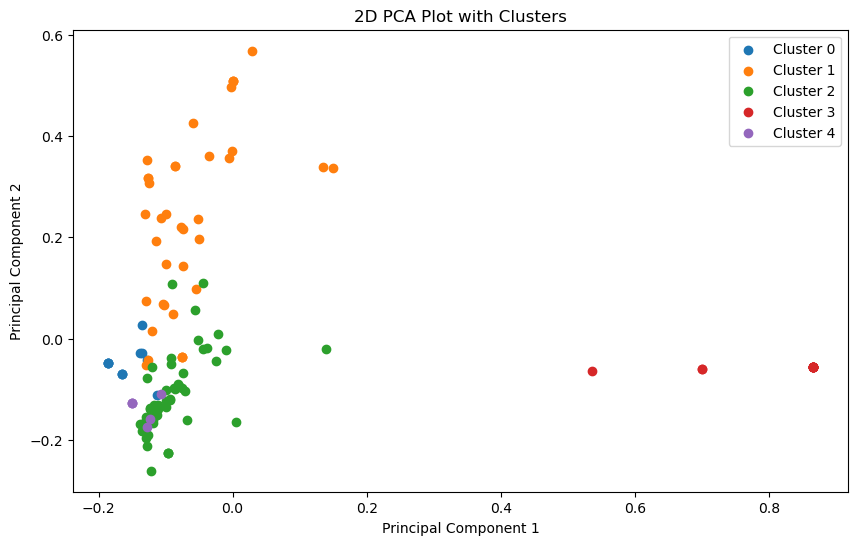

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def cluster_and_visualize(dataframe, text_column='title_cleaned', num_clusters=5):

    # Text vectorization using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(dataframe[text_column])

    # Clustering using K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    dataframe['cluster'] = kmeans.fit_predict(X)

    # Displaying clustering results
    print("Top terms per cluster:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print(f"Cluster {i}:", end='')
        for ind in order_centroids[i, :10]:
            print(f' {terms[ind]}', end='')
        print()

    # Dimensionality reduction for cluster visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())
    dataframe['pca1'] = X_pca[:, 0]
    dataframe['pca2'] = X_pca[:, 1]

    # Displaying a 2D plot with clusters
    plt.figure(figsize=(10, 6))
    for cluster in range(num_clusters):
        cluster_data = dataframe[dataframe['cluster'] == cluster]
        plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster}')

    plt.title('2D PCA Plot with Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

cluster_and_visualize(railway_ireland_related_posts)


Top terms per cluster:
Cluster 0: least update live country coronavirus news say detected uk strain
Cluster 1: canada cause virus restricts due new emerges travel hour suspends
Cluster 2: uk covid strain new case variant world found news first
Cluster 3: variant modelling highlycontagious suggests march peel aggressive growth province rapid
Cluster 4: fluke charge couple st face ontario detected canadian case new


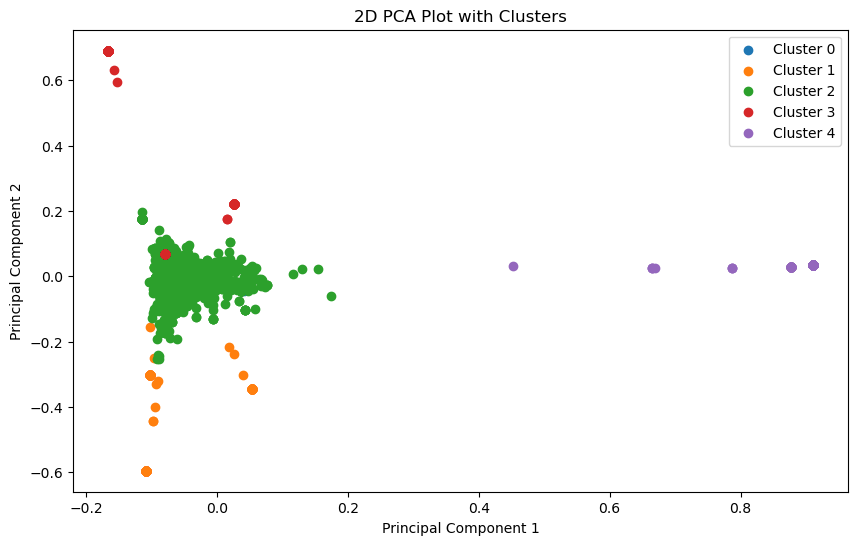

In [144]:
cluster_and_visualize(railway_uk_related_posts)